In [1]:
//%jsroot on

In [2]:
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C+p->d+14C      a=15C A=p b=d  B=14C
//ma=15.0105993 mb=2.01410177811 mB=14.003241988 Ea=27 MeV Eb_Etheta
//Q0=+1.01
Int_t quall_bin=28;
Double_t deltaq=-0.004;
Double_t deltaq1=0.1;
Double_t deltaq2=0.0;
TH1D *q_allm=new TH1D("Ex_all","Ex_all",56,-6+deltaq,22+deltaq); 
TH1D *q_allm1=new TH1D("Ex_1","Ex_1",quall_bin ,-6+deltaq1,22+deltaq1); 
TH1D *q_allm2=new TH1D("Ex_2","Ex_2",quall_bin,-6+deltaq1,22+deltaq1); 
TH1D *q_allm3=new TH1D("Ex_3","Ex_3",quall_bin,-6+deltaq1,22+deltaq1); 
TH1D *q_allmtemp=new TH1D("Ex_all","Ex_all",56,-6,22); 
TH1D *q_nt=new TH1D("Ex_nt","Ex_nt",56,-6,22); 
TH1D *q_t0=new TH1D("Ex_t0","Ex_t0",40,-6+deltaq2,22+deltaq2); 

Warning in <TROOT::Append>: Replacing existing TH1: Ex_all (Potential memory leak).


In [3]:
#define _bin  50
#define _t0bin  30
#define _15C 28.3
#define _H2offset +0.01
#define _t0H2offset -0.95
#define _thetat0offset +0.0
#define _thetaoffset -0
#define _ntarget 2.984e20
#define _n2target 7.174e20

In [4]:
  TGraph *grate=new TGraph();
  TGraph *grate_654=new TGraph();
  TGraph *grate2=new TGraph();
  TGraph *grate2_1=new TGraph();
  TGraph *grate2_2=new TGraph();
  TGraph *grate2_all=new TGraph();
  TGraph *grate_mix=new TGraph();
Double_t temptheta,temprate,taa;
Int_t countrate=0,countrate_654=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_1860_zhangyun_LCTJPG.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>temptheta>>temprate>>taa;
      grate->SetPoint(countrate++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();
ifstream inr2("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_5900_Daehnick_LCTJPG.txt");
  if(inr2.is_open()){
    while(!inr2.eof())
    {
      inr2>>temptheta>>temprate>>taa;
      grate_654->SetPoint(countrate_654++,temptheta,temprate);
        //cout<<temptheta<<'\t'<<temprate*4<<'\n';
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr2.close();

In [5]:
Double_t mean[12],sigma[12],meanangle[12];
Double_t mean2[12],sigma2[12],meanangle2[12];
Double_t eoff[12]={+0.,+0.,+0.,+0.,   +0.,+0.,+0.,+0.,   +0.,+0.,+0.,+0.};
Double_t eoffx2[12]={0.,0.,0.,0.,   0.,0.,0.,0.,   0.,0.,0.,0.};
//Double_t eoffx2[12]={0.0004,0.,0.0020,0.,   0.0004,0.,0.0015,0.0019,   0.0022,0.0015,0.0017,0.0015};
//double eoff[12]={-1.5,-1.5,-1,-1, -1,-1,0,0, -1,-1,-1.5,-1.5};
Double_t theoff[12]={0.34,0.93,-0.5,-0.1,        -0.4,-0.7,0.5,-0.35,           1.2,1.44,0.8,0.95};
for(Int_t ii=0;ii<12;ii++){
    theoff[ii]+=0.1;
    eoffx2[ii]+=0.0004;
    //eoff[ii]+=0.5;
}
for(Int_t ii=0;ii<12;ii++){
    if(ii%2==0)theoff[ii]+=0.1;
    if(ii%2==1)theoff[ii]-=0.1;
    
}
//double theoff[12]={0,0.5,0,0, -0.5,-0.5,0,-0.5, 1.,0,0.5,1.5};
TF1 *g1 = new TF1("g1","gaus");

In [6]:
Double_t anglemax_0=0,anglemax_654=0;

Double_t Q,Ex,Theta;
Int_t i;
TGraph *T1Etheta_B14He3_0= new TGraph;
Double_t Ex_0=1.80;//1.61;//1.86;
i=0;
  for(Ex=0;Ex<200;Ex=Ex+0.1){
    for(Theta=0;Theta<50;Theta=Theta+0.01){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_0)<0.001){
            T1Etheta_B14He3_0->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_0)anglemax_0=Theta;
        }
    }
  }



i=0;
TGraph *T1Etheta_B14He3_13200= new TGraph;
Double_t Ex_13200=10.;
  for(Ex=0;Ex<200;Ex=Ex+0.4){
    for(Theta=0;Theta<50;Theta=Theta+0.1){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_13200)<0.01){
            T1Etheta_B14He3_13200->SetPoint(i++,Theta,Ex);
        }
    }
  }

TGraph *T1Etheta_B14He3_654= new TGraph;
Double_t Ex_654=3.69;//5.68;
  for(Ex=0;Ex<200;Ex=Ex+0.5){
    for(Theta=0;Theta<50;Theta=Theta+0.03){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_654)<0.01){
            T1Etheta_B14He3_654->SetPoint(i++,Theta,Ex);
            if(Theta>anglemax_654)anglemax_654=Theta;
        }
    }
  }


TGraph *T1Etheta_B14He3_8000= new TGraph;
Double_t Ex_8000=5.85;//5.68;
  for(Ex=0;Ex<200;Ex=Ex+0.5){
    for(Theta=0;Theta<50;Theta=Theta+0.02){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_8000)<0.01){
            T1Etheta_B14He3_8000->SetPoint(i++,Theta,Ex);
        }
    }
  }
cout<<"anglemax_0="<<anglemax_0<<'\t'<<"anglemax_654="<<anglemax_654<<'\n';

i=0;

TGraph *T1Etheta_B14He3_10000= new TGraph;
Double_t Ex_10000=8.03;
  for(Ex=0;Ex<200;Ex=Ex+1.5){
    for(Theta=0;Theta<50;Theta=Theta+0.03){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
        if(fabs(Q-Ex_10000)<0.01){
            T1Etheta_B14He3_10000->SetPoint(i++,Theta,Ex);
        }
    }
  }

TGraph *T1Etheta_B14He3_d4He= new TGraph;
Double_t Ex_d4He=4.8;
  for(Ex=0;Ex<200;Ex=Ex+0.4){
    for(Theta=0;Theta<50;Theta=Theta+0.1){
    Q=4.02-((15.0106/13.017780166-1.)*(_15C*15)+(4.00260325413/13.017780166+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*4.00260325413*_15C*15*Ex)/13.017780166);
        if(fabs(Q-Ex_d4He)<0.01){
            T1Etheta_B14He3_d4He->SetPoint(i++,Theta,Ex);
        }
    }
  }

/*


TGraph *T1Etheta_B14He3_1860= new TGraph;
Double_t Ex_1860=1.86;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_1860)<0.01)T1Etheta_B14He3_1860->SetPoint(i++,Theta,Ex);
    }
  }

TGraph *T1Etheta_B14He3_4500= new TGraph;
Double_t Ex_4500=4.5;
  for(Theta=0;Theta<50;Theta=Theta+0.2){
    for(Ex=0;Ex<200;Ex=Ex+0.001){
    Q=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*Ex
       -2.*cos(Theta*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*Ex)/14.025404);
    if(abs(Q-Ex_4500)<0.01)T1Etheta_B14He3_4500->SetPoint(i++,Theta,Ex);
    }
  }
  */

Int_t ii0=0;

anglemax_0=39.98	anglemax_654=38.61


In [7]:
TCanvas *c1=new TCanvas("c1","c1",600,650);
TCanvas *c2=new TCanvas("c2","c2");
TCanvas *c3=new TCanvas("c3","c3",1200,600);

In [8]:
TGraph *count_out_0= new TGraph;
TGraph *solid_out_0= new TGraph;
TGraph *cross_out_0= new TGraph;
Int_t allcount_out_0=0;
Int_t allsolid_out_0=0;
Int_t allcross_out_0=0;
Int_t crosscount_out_0[50];
for(Int_t ii=0;ii<15;ii++){
    crosscount_out_0[ii]=0;   
}

In [9]:
/*
void mergeGraphs(TGraph* sourceGraph, TGraph* destinationGraph) {
    for (int i = 0; i < sourceGraph->GetN(); i++) {
        destinationGraph->SetPoint(destinationGraph->GetN(), sourceGraph->GetX()[i], sourceGraph->GetY()[i]);
    }
}
*/
void mergeGraphs(TGraph* sourceGraph, TGraph* destinationGraph) {
    for (int i = 0; i < sourceGraph->GetN(); i++) {
        double xSource = sourceGraph->GetX()[i];
        double ySource = sourceGraph->GetY()[i];

        bool isDuplicate = false;
        for (int j = 0; j < destinationGraph->GetN(); j++) {
            double xDest = destinationGraph->GetX()[j];
            double yDest = destinationGraph->GetY()[j];

            if (fabs(xSource - xDest) < 0.01 && fabs(ySource - yDest) < 0.01) {
                isDuplicate = true;
                break;
            }
        }

        if (!isDuplicate) {
            if(xSource>100)xSource-=100;
            destinationGraph->SetPoint(destinationGraph->GetN(), xSource, ySource);
        }
    }
}

In [10]:
void mergeGraphsoffset(TGraph* sourceGraph, TGraph* destinationGraph,TGraph* destinationGraph2,int ii) {
    Int_t tempkey;
    Double_t myQ;
    for (int i = 0; i < sourceGraph->GetN(); i++) {
        double xSource = sourceGraph->GetX()[i];
        double ySource = sourceGraph->GetY()[i];
        ySource=ySource-ySource*ySource*eoffx2[ii];
            tempkey=0;
            if(xSource>100){xSource-=100;tempkey=10;}

        bool isDuplicate = false;
        for (int j = 0; j < destinationGraph->GetN(); j++) {
            double xDest = destinationGraph->GetX()[j];
            double yDest = destinationGraph->GetY()[j];

            if (fabs(xSource - xDest) < 0.01 && fabs(ySource - yDest) < 0.01) {
                isDuplicate = true;
                break;
            }
        }

    myQ=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(ySource+0.3)
                -2.*cos((xSource+theoff[ii])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(ySource+0.3))/14.0254);
        if (!isDuplicate) {
            //if(ii==4)cout<<xSource<<'\t'<<ySource<<'\n';
            ySource=ySource;
            if(ii<100){
                ySource+=-0.;
                destinationGraph->SetPoint(destinationGraph->GetN(), xSource+theoff[ii], ySource-0.);
                destinationGraph2->SetPoint(destinationGraph->GetN(), tempkey, ySource-0.);
                //if(ii==0)cout<<xSource+theoff[ii]<<'\t'<<ySource+0.3<<'\t'<<myQ<<'\n';
                //cout<<ii<<'\t'<<xSource+theoff[ii]<<'\t'<<theoff[ii]<<'\n';
            }
            if(ii>=100){
                //ySource+=1.5;
                if(ySource>23)continue;
                i=i%100;
                destinationGraph->SetPoint(destinationGraph->GetN(), xSource+(theoff[ii]+theoff[ii+1])/2., ySource-0.);
                destinationGraph2->SetPoint(destinationGraph->GetN(), tempkey, ySource-0.);
                //cout<<"**"<<ii<<'\t'<<xSource+(theoff[ii]+theoff[ii+1])/2<<'\t'<<(theoff[ii]+theoff[ii+1])/2.<<'\n';
            }
        }
    }
}

In [11]:
TGraph *T1E_newtheta_new_bydstar_0At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5At= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Bt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allt2= new TGraph;
TString fileName_0At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_B3Hett9_3He_all_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_B3Hett9_3He_all_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_B3Hett9_3He_all_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_B3Hett9_3He_all_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5At = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_B3Hett9_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5Bt = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_B3Hett9_3He_all_taf_ad5_ac5B_theta_delay_tarloss.root");

TFile *ipf_0At = new TFile(fileName_0At.Data(),"read");
TFile *ipf_0Bt = new TFile(fileName_0Bt.Data(),"read");
TFile *ipf_1At = new TFile(fileName_1At.Data(),"read");
TFile *ipf_1Bt = new TFile(fileName_1Bt.Data(),"read");
TFile *ipf_2At = new TFile(fileName_2At.Data(),"read");
TFile *ipf_2Bt = new TFile(fileName_2Bt.Data(),"read");
TFile *ipf_3At = new TFile(fileName_3At.Data(),"read");
TFile *ipf_3Bt = new TFile(fileName_3Bt.Data(),"read");
TFile *ipf_4At = new TFile(fileName_4At.Data(),"read");
TFile *ipf_5At = new TFile(fileName_5At.Data(),"read");
TFile *ipf_5Bt = new TFile(fileName_5Bt.Data(),"read");
TCanvas *T1Etheta_new_0At=(TCanvas *)ipf_0At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0Bt=(TCanvas *)ipf_0Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1At=(TCanvas *)ipf_1At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Bt=(TCanvas *)ipf_1Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2At=(TCanvas *)ipf_2At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Bt=(TCanvas *)ipf_2Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3At=(TCanvas *)ipf_3At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Bt=(TCanvas *)ipf_3Bt->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4At=(TCanvas *)ipf_4At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5At=(TCanvas *)ipf_5At->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Bt=(TCanvas *)ipf_5Bt->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0At=(TGraph *)ipf_0At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0Bt=(TGraph *)ipf_0Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1At=(TGraph *)ipf_1At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Bt=(TGraph *)ipf_1Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2At=(TGraph *)ipf_2At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Bt=(TGraph *)ipf_2Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3At=(TGraph *)ipf_3At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Bt=(TGraph *)ipf_3Bt->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4At=(TGraph *)ipf_4At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5At=(TGraph *)ipf_5At->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Bt=(TGraph *)ipf_5Bt->Get("T1Etheta_new_bydstar");

if(1){
    
    mergeGraphsoffset(T1Etheta_new_bydstar_2At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,4);
    mergeGraphsoffset(T1Etheta_new_bydstar_4At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,8);
    
    mergeGraphsoffset(T1Etheta_new_bydstar_0At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,0);
    mergeGraphsoffset(T1Etheta_new_bydstar_0Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,1);
    mergeGraphsoffset(T1Etheta_new_bydstar_1At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,2);
    mergeGraphsoffset(T1Etheta_new_bydstar_1Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,3);
    mergeGraphsoffset(T1Etheta_new_bydstar_2Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,5);
    mergeGraphsoffset(T1Etheta_new_bydstar_3At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,6);
    mergeGraphsoffset(T1Etheta_new_bydstar_3Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,7);
    mergeGraphsoffset(T1Etheta_new_bydstar_5At,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,10);
    mergeGraphsoffset(T1Etheta_new_bydstar_5Bt,T1E_newtheta_new_bydstar_allt,T1E_newtheta_new_bydstar_allt2,11);
    
}

In [12]:
TGraph *T1E_newtheta_new_bydstar_0Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Ant= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allnt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allnt2= new TGraph;
TString fileName_0Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_1Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_2Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_3Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_4Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5Ant = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ntnB13_B3Hett9_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");

TFile *ipf_0Ant = new TFile(fileName_0Ant.Data(),"read");
TFile *ipf_1Ant = new TFile(fileName_1Ant.Data(),"read");
TFile *ipf_2Ant = new TFile(fileName_2Ant.Data(),"read");
TFile *ipf_3Ant = new TFile(fileName_3Ant.Data(),"read");
TFile *ipf_4Ant = new TFile(fileName_4Ant.Data(),"read");
TFile *ipf_5Ant = new TFile(fileName_5Ant.Data(),"read");
TCanvas *T1Etheta_new_0Ant=(TCanvas *)ipf_0Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Ant=(TCanvas *)ipf_1Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Ant=(TCanvas *)ipf_2Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Ant=(TCanvas *)ipf_3Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4Ant=(TCanvas *)ipf_4Ant->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Ant=(TCanvas *)ipf_5Ant->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0Ant=(TGraph *)ipf_0Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Ant=(TGraph *)ipf_1Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Ant=(TGraph *)ipf_2Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Ant=(TGraph *)ipf_3Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4Ant=(TGraph *)ipf_4Ant->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Ant=(TGraph *)ipf_5Ant->Get("T1Etheta_new_bydstar");
if(0){
     mergeGraphsoffset(T1Etheta_new_bydstar_0Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,100);
     mergeGraphsoffset(T1Etheta_new_bydstar_1Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,102);
     mergeGraphsoffset(T1Etheta_new_bydstar_2Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,104);
     mergeGraphsoffset(T1Etheta_new_bydstar_3Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,106);
     mergeGraphsoffset(T1Etheta_new_bydstar_4Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,108);
     mergeGraphsoffset(T1Etheta_new_bydstar_5Ant,T1E_newtheta_new_bydstar_allnt,T1E_newtheta_new_bydstar_allnt2,110);
}

In [13]:
TGraph *T1E_newtheta_new_bydstar_allm= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allm2= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allmt= new TGraph;
TGraph *T1E_newtheta_new_bydstar_allmnt= new TGraph;
Double_t myQlow=-100.,myQhigh=200.25;
Double_t myEhigh=90;
Double_t anglemax=41.;
Double_t txDest,tyDest,tkey,myQ;
Double_t newQ_alow[3],newQ_ahigh[3];
Double_t newQ_elow[3],newQ_ehigh[3];
newQ_alow[0]=24;newQ_ahigh[0]=31;
newQ_alow[1]=31;newQ_ahigh[1]=42;
newQ_alow[2]=31;newQ_ahigh[2]=42;
newQ_elow[0]=0;newQ_ehigh[0]=40;
newQ_elow[1]=0;newQ_ehigh[1]=40;
newQ_elow[2]=40;newQ_ehigh[2]=60;


Int_t count_nt=0,count_allm=0,count_t=0;
        for (int j = 0; j < T1E_newtheta_new_bydstar_allt->GetN(); j++) {
            txDest = T1E_newtheta_new_bydstar_allt->GetX()[j];
            tyDest = T1E_newtheta_new_bydstar_allt->GetY()[j];
            tkey = T1E_newtheta_new_bydstar_allt2->GetX()[j];
    myQ=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*tyDest
                -2.*cos(txDest*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*tyDest)/14.0254);
            if(txDest<anglemax&&myQ>myQlow&&myQ<myQhigh&&tyDest<myEhigh){
                      T1E_newtheta_new_bydstar_allmt->SetPoint(count_t++, txDest, tyDest);
              T1E_newtheta_new_bydstar_allm->SetPoint(count_allm, txDest, tyDest);
              T1E_newtheta_new_bydstar_allm2->SetPoint(count_allm++, tkey, tyDest);
                //if(txDest>40)cout<<txDest<<'\n';
            }
            if(txDest<anglemax&&myQ>myQlow&&myQ<myQhigh&&tyDest<myEhigh)q_allm->Fill(myQ);
            if(txDest<anglemax&&myQ>myQlow&&myQ<myQhigh&&tyDest<myEhigh)q_allmtemp->Fill(myQ);
            
if(txDest<newQ_ahigh[0]&&txDest>newQ_alow[0]&&tyDest<newQ_ehigh[0]&&tyDest>newQ_elow[0]&&myQ>myQlow&&myQ<myQhigh)q_allm1->Fill(myQ);
if(txDest<newQ_ahigh[1]&&txDest>newQ_alow[1]&&tyDest<newQ_ehigh[1]&&tyDest>newQ_elow[1]&&myQ>myQlow&&myQ<myQhigh)q_allm2->Fill(myQ);
if(txDest<newQ_ahigh[2]&&txDest>newQ_alow[2]&&tyDest<newQ_ehigh[2]&&tyDest>newQ_elow[2]&&myQ>myQlow&&myQ<myQhigh)q_allm3->Fill(myQ);
    
        }

        for (int j = T1E_newtheta_new_bydstar_allt->GetN(); j < T1E_newtheta_new_bydstar_allt->GetN()+T1E_newtheta_new_bydstar_allnt->GetN(); j++) {
            txDest = T1E_newtheta_new_bydstar_allnt->GetX()[j-T1E_newtheta_new_bydstar_allt->GetN()];
            tyDest = T1E_newtheta_new_bydstar_allnt->GetY()[j-T1E_newtheta_new_bydstar_allt->GetN()];
            tkey = T1E_newtheta_new_bydstar_allnt2->GetX()[j-T1E_newtheta_new_bydstar_allt->GetN()];
    myQ=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*tyDest
                -2.*cos(txDest*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*tyDest)/14.0254);
            if(myQ>myQlow&&myQ<myQhigh){
              //if(myQ>0.5)
                  //if(txDest<39.2)
                      T1E_newtheta_new_bydstar_allmnt->SetPoint(count_nt++, txDest, tyDest);
              T1E_newtheta_new_bydstar_allm->SetPoint(count_allm, txDest, tyDest);
              T1E_newtheta_new_bydstar_allm2->SetPoint(count_allm++, tkey, tyDest);
            }
            //if(tyDest<myEhigh&&myQ>0.5)
                if(myQ>myQlow&&myQ<myQhigh)q_allm->Fill(myQ);
            //if(tyDest<myEhigh)q_nt->Fill(myQ);
if(txDest<newQ_ahigh[0]&&txDest>newQ_alow[0]&&tyDest<newQ_ehigh[0]&&tyDest>newQ_elow[0]&&myQ>myQlow&&myQ<myQhigh)q_allm1->Fill(myQ);
if(txDest<newQ_ahigh[1]&&txDest>newQ_alow[1]&&tyDest<newQ_ehigh[1]&&tyDest>newQ_elow[1]&&myQ>myQlow&&myQ<myQhigh)q_allm2->Fill(myQ);
if(txDest<newQ_ahigh[2]&&txDest>newQ_alow[2]&&tyDest<newQ_ehigh[2]&&tyDest>newQ_elow[2]&&myQ>myQlow&&myQ<myQhigh)q_allm3->Fill(myQ);            

        }


In [14]:
TGraph *T1E_newtheta_new_bydstar_0Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0Bb= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1Bb= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2Bb= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3Bb= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4Bb= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Ab= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5Bb= new TGraph;

TGraph *T1E_newtheta_new_bydstar_0A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_0B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_1B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_2B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_3B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_4B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5A= new TGraph;
TGraph *T1E_newtheta_new_bydstar_5B= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0a= new TGraph;
TGraph *T1E_newtheta_new_bydstar_t0b= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all= new TGraph;
TGraph *T1E_newtheta_new_bydstar_all2= new TGraph;

In [15]:
TString fileName_0Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_4Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5Ab = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5Bb = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_all_taf_ad5_ac5B_theta_delay_tarloss.root");
TFile *ipf_0Ab = new TFile(fileName_0Ab.Data(),"read");
TFile *ipf_0Bb = new TFile(fileName_0Bb.Data(),"read");
TFile *ipf_1Ab = new TFile(fileName_1Ab.Data(),"read");
TFile *ipf_1Bb = new TFile(fileName_1Bb.Data(),"read");
TFile *ipf_2Ab = new TFile(fileName_2Ab.Data(),"read");
TFile *ipf_2Bb = new TFile(fileName_2Bb.Data(),"read");
TFile *ipf_3Ab = new TFile(fileName_3Ab.Data(),"read");
TFile *ipf_3Bb = new TFile(fileName_3Bb.Data(),"read");
TFile *ipf_4Ab = new TFile(fileName_4Ab.Data(),"read");
TFile *ipf_4Bb = new TFile(fileName_4Bb.Data(),"read");
TFile *ipf_5Ab = new TFile(fileName_5Ab.Data(),"read");
TFile *ipf_5Bb = new TFile(fileName_5Bb.Data(),"read");
TCanvas *T1Etheta_new_0Ab=(TCanvas *)ipf_0Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0Bb=(TCanvas *)ipf_0Bb->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Ab=(TCanvas *)ipf_1Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1Bb=(TCanvas *)ipf_1Bb->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Ab=(TCanvas *)ipf_2Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2Bb=(TCanvas *)ipf_2Bb->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Ab=(TCanvas *)ipf_3Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3Bb=(TCanvas *)ipf_3Bb->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4Ab=(TCanvas *)ipf_4Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4Bb=(TCanvas *)ipf_4Bb->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Ab=(TCanvas *)ipf_5Ab->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5Bb=(TCanvas *)ipf_5Bb->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0Ab=(TGraph *)ipf_0Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0Bb=(TGraph *)ipf_0Bb->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Ab=(TGraph *)ipf_1Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1Bb=(TGraph *)ipf_1Bb->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Ab=(TGraph *)ipf_2Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2Bb=(TGraph *)ipf_2Bb->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Ab=(TGraph *)ipf_3Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3Bb=(TGraph *)ipf_3Bb->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4Ab=(TGraph *)ipf_4Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4Bb=(TGraph *)ipf_4Bb->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Ab=(TGraph *)ipf_5Ab->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5Bb=(TGraph *)ipf_5Bb->Get("T1Etheta_new_bydstar");

In [16]:
TString fileName_0A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_0B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad0_ac0B_theta_delay_tarloss.root");
TString fileName_1A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad1_ac1A_theta_delay_tarloss.root");
TString fileName_1B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad1_ac1B_theta_delay_tarloss.root");
TString fileName_2A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad2_ac2A_theta_delay_tarloss.root");
TString fileName_2B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad2_ac2B_theta_delay_tarloss.root");
TString fileName_3A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad3_ac3A_theta_delay_tarloss.root");
TString fileName_3B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad3_ac3B_theta_delay_tarloss.root");
TString fileName_4A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_4B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad4_ac4A_theta_delay_tarloss.root");
TString fileName_5A = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/tnB13_b_3He_all_taf_ad5_ac5A_theta_delay_tarloss.root");
TString fileName_5B = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/nB13_b_3He_all_taf_ad5_ac5B_theta_delay_tarloss.root");
TString fileName_t0 = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/ball_nB13_3He_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_t0a = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_453_492_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TString fileName_t0b = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/taf_E_theta/graph_2H/bnB13_3He_493_530_t0_all_taf_ad0_ac0A_theta_delay_tarloss.root");
TFile *ipf_0A = new TFile(fileName_0A.Data(),"read");
TFile *ipf_0B = new TFile(fileName_0B.Data(),"read");
TFile *ipf_1A = new TFile(fileName_1A.Data(),"read");
TFile *ipf_1B = new TFile(fileName_1B.Data(),"read");
TFile *ipf_2A = new TFile(fileName_2A.Data(),"read");
TFile *ipf_2B = new TFile(fileName_2B.Data(),"read");
TFile *ipf_3A = new TFile(fileName_3A.Data(),"read");
TFile *ipf_3B = new TFile(fileName_3B.Data(),"read");
TFile *ipf_4A = new TFile(fileName_4A.Data(),"read");
TFile *ipf_4B = new TFile(fileName_4B.Data(),"read");
TFile *ipf_5A = new TFile(fileName_5A.Data(),"read");
TFile *ipf_5B = new TFile(fileName_5B.Data(),"read");
TFile *ipf_t0 = new TFile(fileName_t0.Data(),"read");
TFile *ipf_t0a = new TFile(fileName_t0a.Data(),"read");
TFile *ipf_t0b = new TFile(fileName_t0b.Data(),"read");
TCanvas *T1Etheta_new_0A=(TCanvas *)ipf_0A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_0B=(TCanvas *)ipf_0B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1A=(TCanvas *)ipf_1A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_1B=(TCanvas *)ipf_1B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2A=(TCanvas *)ipf_2A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_2B=(TCanvas *)ipf_2B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3A=(TCanvas *)ipf_3A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_3B=(TCanvas *)ipf_3B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4A=(TCanvas *)ipf_4A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_4B=(TCanvas *)ipf_4B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5A=(TCanvas *)ipf_5A->Get("T1Etheta_new");
TCanvas *T1Etheta_new_5B=(TCanvas *)ipf_5B->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0=(TCanvas *)ipf_t0->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0a=(TCanvas *)ipf_t0a->Get("T1Etheta_new");
TCanvas *T1Etheta_new_t0b=(TCanvas *)ipf_t0b->Get("T1Etheta_new");
TGraph *T1Etheta_new_bydstar_0A=(TGraph *)ipf_0A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_0B=(TGraph *)ipf_0B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1A=(TGraph *)ipf_1A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_1B=(TGraph *)ipf_1B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2A=(TGraph *)ipf_2A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_2B=(TGraph *)ipf_2B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3A=(TGraph *)ipf_3A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_3B=(TGraph *)ipf_3B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4A=(TGraph *)ipf_4A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_4B=(TGraph *)ipf_4B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5A=(TGraph *)ipf_5A->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_5B=(TGraph *)ipf_5B->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0=(TGraph *)ipf_t0->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0a=(TGraph *)ipf_t0a->Get("T1Etheta_new_bydstar");
TGraph *T1Etheta_new_bydstar_t0b=(TGraph *)ipf_t0b->Get("T1Etheta_new_bydstar");

if(0){
    mergeGraphs(T1Etheta_new_bydstar_0Ab, T1Etheta_new_bydstar_0A);
    mergeGraphs(T1Etheta_new_bydstar_0Bb, T1Etheta_new_bydstar_0B);
    mergeGraphs(T1Etheta_new_bydstar_1Ab, T1Etheta_new_bydstar_1A);
    mergeGraphs(T1Etheta_new_bydstar_1Bb, T1Etheta_new_bydstar_1B);
    mergeGraphs(T1Etheta_new_bydstar_2Ab, T1Etheta_new_bydstar_2A);
    mergeGraphs(T1Etheta_new_bydstar_2Bb, T1Etheta_new_bydstar_2B);
    mergeGraphs(T1Etheta_new_bydstar_3Ab, T1Etheta_new_bydstar_3A);
    mergeGraphs(T1Etheta_new_bydstar_3Bb, T1Etheta_new_bydstar_3B);
    mergeGraphs(T1Etheta_new_bydstar_4Ab, T1Etheta_new_bydstar_4A);
    mergeGraphs(T1Etheta_new_bydstar_4Bb, T1Etheta_new_bydstar_4B);
    mergeGraphs(T1Etheta_new_bydstar_5Ab, T1Etheta_new_bydstar_5A);
    mergeGraphs(T1Etheta_new_bydstar_5Bb, T1Etheta_new_bydstar_5B);
}

Int_t npoints_0A=T1Etheta_new_bydstar_0A->GetN();
Int_t npoints_0B=T1Etheta_new_bydstar_0B->GetN();
Int_t npoints_1A=T1Etheta_new_bydstar_1A->GetN();
Int_t npoints_1B=T1Etheta_new_bydstar_1B->GetN();
Int_t npoints_2A=T1Etheta_new_bydstar_2A->GetN();
Int_t npoints_2B=T1Etheta_new_bydstar_2B->GetN();
Int_t npoints_3A=T1Etheta_new_bydstar_3A->GetN();
Int_t npoints_3B=T1Etheta_new_bydstar_3B->GetN();
Int_t npoints_4A=T1Etheta_new_bydstar_4A->GetN();
Int_t npoints_4B=T1Etheta_new_bydstar_4B->GetN();
Int_t npoints_5A=T1Etheta_new_bydstar_5A->GetN();
Int_t npoints_5B=T1Etheta_new_bydstar_5B->GetN();
Int_t npoints_t0=T1Etheta_new_bydstar_t0->GetN();
Int_t npoints_t0a=T1Etheta_new_bydstar_t0a->GetN();
Int_t npoints_t0b=T1Etheta_new_bydstar_t0b->GetN();
Double_t *Eb_0A=T1Etheta_new_bydstar_0A->GetY();
Double_t *Eb_0B=T1Etheta_new_bydstar_0B->GetY();
Double_t *Eb_1A=T1Etheta_new_bydstar_1A->GetY();
Double_t *Eb_1B=T1Etheta_new_bydstar_1B->GetY();
Double_t *Eb_2A=T1Etheta_new_bydstar_2A->GetY();
Double_t *Eb_2B=T1Etheta_new_bydstar_2B->GetY();
Double_t *Eb_3A=T1Etheta_new_bydstar_3A->GetY();
Double_t *Eb_3B=T1Etheta_new_bydstar_3B->GetY();
Double_t *Eb_4A=T1Etheta_new_bydstar_4A->GetY();
Double_t *Eb_4B=T1Etheta_new_bydstar_4B->GetY();
Double_t *Eb_5A=T1Etheta_new_bydstar_5A->GetY();
Double_t *Eb_5B=T1Etheta_new_bydstar_5B->GetY();
Double_t *Eb_t0=T1Etheta_new_bydstar_t0->GetY();
Double_t *Eb_t0a=T1Etheta_new_bydstar_t0a->GetY();
Double_t *Eb_t0b=T1Etheta_new_bydstar_t0b->GetY();
Double_t *theta_0A=T1Etheta_new_bydstar_0A->GetX();
Double_t *theta_0B=T1Etheta_new_bydstar_0B->GetX();
Double_t *theta_1A=T1Etheta_new_bydstar_1A->GetX();
Double_t *theta_1B=T1Etheta_new_bydstar_1B->GetX();
Double_t *theta_2A=T1Etheta_new_bydstar_2A->GetX();
Double_t *theta_2B=T1Etheta_new_bydstar_2B->GetX();
Double_t *theta_3A=T1Etheta_new_bydstar_3A->GetX();
Double_t *theta_3B=T1Etheta_new_bydstar_3B->GetX();
Double_t *theta_4A=T1Etheta_new_bydstar_4A->GetX();
Double_t *theta_4B=T1Etheta_new_bydstar_4B->GetX();
Double_t *theta_5A=T1Etheta_new_bydstar_5A->GetX();
Double_t *theta_5B=T1Etheta_new_bydstar_5B->GetX();
Double_t *theta_t0=T1Etheta_new_bydstar_t0->GetX();
Double_t *theta_t0a=T1Etheta_new_bydstar_t0a->GetX();
Double_t *theta_t0b=T1Etheta_new_bydstar_t0b->GetX();

In [17]:

TH1D *q_0A=new TH1D("Ex_0A","Ex_0A",_bin*2,-20,20); 
TH1D *q_0B=new TH1D("Ex_0B","Ex_0B",_bin*2,-20,20); 
TH1D *q_1A=new TH1D("Ex_1A","Ex_1A",_bin*2,-20,20); 
TH1D *q_1B=new TH1D("Ex_1B","Ex_1B",_bin*2,-20,20); 
TH1D *q_2A=new TH1D("Ex_2A","Ex_2A",_bin*2,-20,20); 
TH1D *q_2B=new TH1D("Ex_2B","Ex_2B",_bin*2,-20,20); 
TH1D *q_3A=new TH1D("Ex_3A","Ex_3A",_bin*2,-20,20); 
TH1D *q_3B=new TH1D("Ex_3B","Ex_3B",_bin*2,-20,20); 
TH1D *q_4A=new TH1D("Ex_4A","Ex_4A",_bin*2,-20,20); 
TH1D *q_4B=new TH1D("Ex_4B","Ex_4B",_bin*2,-20,20); 
TH1D *q_5A=new TH1D("Ex_5A","Ex_5A",_bin*2,-20,20); 
TH1D *q_5B=new TH1D("Ex_5B","Ex_5B",_bin*2,-20,20); 
TH1D *q_t0a=new TH1D("Ex_t0a","Ex_t0a",_t0bin*2,-20,20); 
TH1D *q_t0b=new TH1D("Ex_t0b","Ex_t0b",_t0bin*2,-20,20); 
TH1D *t_0A=new TH1D("An_0A","An_0A",_bin*2,-20,20); 
TH1D *t_0B=new TH1D("An_0B","An_0B",_bin*2,-20,20); 
TH1D *t_1A=new TH1D("An_1A","An_1A",_bin*2,-20,20); 
TH1D *t_1B=new TH1D("An_1B","An_1B",_bin*2,-20,20); 
TH1D *t_2A=new TH1D("An_2A","An_2A",_bin*2,-20,20); 
TH1D *t_2B=new TH1D("An_2B","An_2B",_bin*2,-20,20); 
TH1D *t_3A=new TH1D("An_3A","An_3A",_bin*2,-20,20); 
TH1D *t_3B=new TH1D("An_3B","An_3B",_bin*2,-20,20); 
TH1D *t_4A=new TH1D("An_4A","An_4A",_bin*2,-20,20); 
TH1D *t_4B=new TH1D("An_4B","An_4B",_bin*2,-20,20); 
TH1D *t_5A=new TH1D("An_5A","An_5A",_bin*2,-20,20); 
TH1D *t_5B=new TH1D("An_5B","An_5B",_bin*2,-20,20); 
TH1D *t_t0=new TH1D("An_t0","An_t0",_t0bin*1,30,50); 
Double_t Q_0A[50000];
Double_t Q_0B[50000];
Double_t Q_1A[50000];
Double_t Q_1B[50000];
Double_t Q_2A[50000];
Double_t Q_2B[50000];
Double_t Q_3A[50000];
Double_t Q_3B[50000];
Double_t Q_4A[50000];
Double_t Q_4B[50000];
Double_t Q_5A[50000];
Double_t Q_5B[50000];
Double_t Q_t0[50000];
Double_t Q_t0a[50000];
Double_t Q_t0b[50000];
for(Int_t i=0;i<50000;i++)Q_0A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_0B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_1B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_2B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_3B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_4B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5A[i]=-999;
for(Int_t i=0;i<50000;i++)Q_5B[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0a[i]=-999;
for(Int_t i=0;i<50000;i++)Q_t0b[i]=-999;
Int_t count_all=0;
//ad0
ii0=0;
Int_t theangle=0;

Double_t meanQ_0=5,deltaQ_0=30;
Double_t q_maxE=60.;
Double_t q_maxE_0=40.;
Int_t anglebin_0=3;
Int_t anglehigh_0=46,anglelow_0=22;

   Int_t thetafsolidangle_0[15];
   Int_t thetafsolidangle_6900[15];
   Double_t thetafangle;

TH1D *q_all=new TH1D("Ex_all","Ex_all",80,-6,22); 
TH1D *q_cut_0[50];
TString name_q_cut;
for(Int_t ii=0;ii<50;ii++){
    name_q_cut= TString::Format("%d - %d",anglelow_0+ii*anglebin_0,anglelow_0+(ii+1)*anglebin_0);
    q_cut_0[ii]=new TH1D(name_q_cut.Data(),name_q_cut.Data(),_bin*2,-20,20); 
}
Int_t mycountt0=0,mycountt0a=0,mycountt0b=0;

   //TBranch *b_tafangle;
/*
for(Int_t ii=0;ii<15;ii++){thetafsolidangle_0[ii]=0;thetafsolidangle_6900[ii]=0;}
   tudead->SetBranchAddress("tafangle", &thetafangle);

   Long64_t nentries = tudead->GetEntries();
   for (Long64_t jentry=1; jentry<nentries;jentry++) {
      //Long64_t ientry05 = LoadTree(jentry05);
      tudead->GetEntry(jentry);
      theangle=((Int_t)(thetafangle-anglelow_6900))/anglebin_6900;
      if(theangle>=0&&theangle<=(anglehigh_6900-anglelow_6900)/anglebin_6900){
            thetafsolidangle_6900[theangle]++;
      }
      theangle=((Int_t)(thetafangle-anglelow_0))/anglebin_0;
      if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            thetafsolidangle_0[theangle]++;
      }
   }
*/
Double_t keyrun=-1;
Double_t keyrunnum=5;
Double_t theQmin=-20.;
Double_t theQmax=30.;


ii0=0;

for(Int_t i=0;i<npoints_t0;i++){
    Q_t0[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0[i]+_t0H2offset)
    -2.*cos((theta_t0[i]-_thetat0offset)*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0[i]+_t0H2offset))/14.003241988);
    if(i<npoints_t0a){
    Q_t0a[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0a[i]+_t0H2offset)
    -2.*cos((theta_t0a[i]-_thetat0offset)*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0a[i]+_t0H2offset))/14.003241988);
    }
    if(i<npoints_t0b){
    Q_t0b[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_t0b[i]+_t0H2offset)
    -2.*cos((theta_t0b[i]-_thetat0offset)*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_t0b[i]+_t0H2offset))/14.003241988);
    }

//    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-15)<7.){
//        q_t0->Fill(Q_t0[i]);
//        //q_all->Fill(Q_t0[i]);
//    }
//    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-11.5)<3.5)q_t0a->Fill(Q_t0[i]);
//    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-18.5)<3.5)q_t0b->Fill(Q_t0[i]);

    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-15)<70.){
        cout<<Q_t0[i]<<",";
        q_t0->Fill(Q_t0[i]);
        //q_all->Fill(Q_t0[i]);
        //q_allm->Fill(Q_t0[i]);
    }
    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-10.5)<2.5)q_t0a->Fill(Q_t0[i]);
    if(fabs(Q_t0[i]-5)<=20&&fabs((theta_t0[i]-_thetat0offset)-15.5)<2.5)q_t0b->Fill(Q_t0[i]);
    //if(abs(theta_0B[i]-anglemax_6600)<3&&Q_0B[i]>=3&&abs(Eb_0B[i]-30)<=10)t_0B->Fill(theta_0B[i]);
    if(Q_t0[i]<300.&&Q_t0[i]>=-100.&&fabs(Eb_t0[i]+_t0H2offset-14)<11.){
      T1E_newtheta_new_bydstar_t0->SetPoint(mycountt0++,theta_t0[i]-_thetat0offset,Eb_t0[i]+_t0H2offset);
    }
    if(Q_t0a[i]<3.&&Q_t0a[i]>=-0.&&fabs(Eb_t0a[i]+_t0H2offset-14)<11.&&i<npoints_t0a){
      T1E_newtheta_new_bydstar_t0a->SetPoint(mycountt0a++,theta_t0a[i]-_thetat0offset,Eb_t0a[i]+_t0H2offset);
    }
    if(Q_t0b[i]<3.&&Q_t0b[i]>=-0.&&fabs(Eb_t0b[i]+_t0H2offset-14)<11.&&i<npoints_t0b){
      T1E_newtheta_new_bydstar_t0b->SetPoint(mycountt0b++,theta_t0b[i]-_thetat0offset,Eb_t0b[i]+_t0H2offset);
    }
    //T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_t0[i],(Eb_t0[i]+_t0H2offset));
    //T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_t0[i]);
    //q_all->Fill(Q_t0[i]);
    
}

ii0=0;
for(Int_t i=0;i<npoints_0A;i++){
    if(theta_0A[i]>100){keyrun=10;theta_0A[i]-=100;}
    else keyrun=0;
    Q_0A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])
    -2.*cos((theta_0A[i]+theoff[0])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]))/14.0254); 
    if(keyrun<keyrunnum&&abs(Q_0A[i]-0)<=50&&(Eb_0A[i]+_H2offset)<q_maxE){
    q_0A->Fill(Q_0A[i]);
    t_0A->Fill(Q_0A[i]);
    }
    //if(abs((theta_0A[i]+theoff[0])-33)<=16&&(Eb_0A[i]+_H2offset)<60)
    if(Q_0A[i]<=theQmax&&Q_0A[i]>=theQmin&&(abs(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_0A->SetPoint(ii0++,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0A[i]+theoff[0],(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_0A[i]);
    q_all->Fill(Q_0A[i]);
        //cout<<theta_0A[i]+theoff[0]<<'\t'<<Eb_0A[i]+eoff[0]<<'\t'<<Q_0A[i]<<'\n';
    }
    if(abs(Q_0A[i]-meanQ_0)<=deltaQ_0&&(Eb_0A[i]+eoff[0]-eoffx2[0]*Eb_0A[i]*Eb_0A[i])<q_maxE_0){
        theangle=((Int_t)(theta_0A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_0B;i++){
    if(theta_0B[i]>100){keyrun=10;theta_0B[i]-=100;}
    else keyrun=0;
    Q_0B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])
    -2.*cos((theta_0B[i]+theoff[1])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_0B[i]-0)<=50&&(Eb_0B[i]+_H2offset)<q_maxE){
    q_0B->Fill(Q_0B[i]);
    t_0B->Fill(Q_0B[i]);
    }
    //if(abs((theta_0B[i]+theoff[1])-33)<=16&&(Eb_0B[i]+_H2offset)<60)
    if(Q_0B[i]<=theQmax&&Q_0B[i]>=theQmin&&(abs(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_0B->SetPoint(ii0++,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_0B[i]+theoff[1],(Eb_0B[i]+eoff[1]-eoffx2[1]*Eb_0B[i]*Eb_0B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_0B[i]);
    q_all->Fill(Q_0B[i]);
    }
    if(abs(Q_0B[i]-meanQ_0)<=deltaQ_0&&(Eb_0B[i]+eoff[0]-eoffx2[0]*Eb_0B[i]*Eb_0B[i])<q_maxE_0){
        theangle=((Int_t)(theta_0B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_0B[i]);
        }
    }
}
ii0=0;
//ad1
for(Int_t i=0;i<npoints_1A;i++){
    if(theta_1A[i]>100){keyrun=10;theta_1A[i]-=100;}
    else keyrun=0;
    Q_1A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])
    -2.*cos((theta_1A[i]+theoff[2])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_1A[i]-0)<=50&&(Eb_1A[i]+_H2offset)<q_maxE){
    q_1A->Fill(Q_1A[i]);
    t_1A->Fill(Q_1A[i]);
    }
    //if(abs((theta_1A[i]+theoff[2])-33)<=16&&(Eb_1A[i]+_H2offset)<60)
    if(Q_1A[i]<=theQmax&&Q_1A[i]>=theQmin&&(abs(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_1A->SetPoint(ii0++,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1A[i]+theoff[2],(Eb_1A[i]+eoff[2]-eoffx2[2]*Eb_1A[i]*Eb_1A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_1A[i]);
    q_all->Fill(Q_1A[i]);
    }
    if(abs(Q_1A[i]-meanQ_0)<=deltaQ_0&&(Eb_1A[i]+eoff[0]-eoffx2[0]*Eb_1A[i]*Eb_1A[i])<q_maxE_0){
        theangle=((Int_t)(theta_1A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_1B;i++){
    if(theta_1B[i]>100){keyrun=10;theta_1B[i]-=100;}
    else keyrun=0;
    Q_1B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])
    -2.*cos((theta_1B[i]+theoff[3])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_1B[i]-0)<=50&&(Eb_1B[i]+_H2offset)<q_maxE){
    q_1B->Fill(Q_1B[i]);
    t_1B->Fill(Q_1B[i]);
    }
    //if(abs((theta_1B[i]+theoff[3])-33)<=16&&(Eb_1B[i]+_H2offset)<60)
    if(Q_1B[i]<=theQmax&&Q_1B[i]>=theQmin&&(abs(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_1B->SetPoint(ii0++,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_1B[i]+theoff[3],(Eb_1B[i]+eoff[3]-eoffx2[3]*Eb_1B[i]*Eb_1B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_1B[i]);
    q_all->Fill(Q_1B[i]);
    }
    if(abs(Q_1B[i]-meanQ_0)<=deltaQ_0&&(Eb_1B[i]+eoff[0]-eoffx2[0]*Eb_1B[i]*Eb_1B[i])<q_maxE_0){
        theangle=((Int_t)(theta_1B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_1B[i]);
        }
    }
}
ii0=0;
//ad2
for(Int_t i=0;i<npoints_2A;i++){
    if(theta_2A[i]>100){keyrun=10;theta_2A[i]-=100;}
    else keyrun=0;
    Q_2A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])
    -2.*cos((theta_2A[i]+theoff[4])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_2A[i]-0)<=50&&(Eb_2A[i]+_H2offset)<q_maxE){
    q_2A->Fill(Q_2A[i]);
    t_2A->Fill(Q_2A[i]);
    }
    //if(abs((theta_2A[i]+theoff[4])-33)<=16&&(Eb_2A[i]+_H2offset)<60)
    if(Q_2A[i]<=theQmax&&Q_2A[i]>=theQmin&&(abs(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_2A->SetPoint(ii0++,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2A[i]+theoff[4],(Eb_2A[i]+eoff[4]-eoffx2[4]*Eb_2A[i]*Eb_2A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_2A[i]);
    q_all->Fill(Q_2A[i]);
    }
    if(abs(Q_2A[i]-meanQ_0)<=deltaQ_0&&(Eb_2A[i]+eoff[0]-eoffx2[0]*Eb_2A[i]*Eb_2A[i])<q_maxE_0){
        theangle=((Int_t)(theta_2A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_2B;i++){
    if(theta_2B[i]>100){keyrun=10;theta_2B[i]-=100;}
    else keyrun=0;
    Q_2B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])
    -2.*cos((theta_2B[i]+theoff[5])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_2B[i]-0)<=50&&(Eb_2B[i]+_H2offset)<q_maxE){
    q_2B->Fill(Q_2B[i]);
    t_2B->Fill(Q_2B[i]);
    }
    //if(abs((theta_2B[i]+theoff[5])-33)<=16&&(Eb_2B[i]+_H2offset)<60)
    if(Q_2B[i]<=theQmax&&Q_2B[i]>=theQmin&&(abs(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_2B->SetPoint(ii0++,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_2B[i]+theoff[5],(Eb_2B[i]+eoff[5]-eoffx2[5]*Eb_2B[i]*Eb_2B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_2B[i]);
    q_all->Fill(Q_2B[i]);
    }
    if(abs(Q_2B[i]-meanQ_0)<=deltaQ_0&&(Eb_2B[i]+eoff[0]-eoffx2[0]*Eb_2B[i]*Eb_2B[i])<q_maxE_0){
        theangle=((Int_t)(theta_2B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_2B[i]);
        }
    }
}
//ad3
ii0=0;
for(Int_t i=0;i<npoints_3A;i++){
    if(theta_3A[i]>100){keyrun=10;theta_3A[i]-=100;}
    else keyrun=0;
    Q_3A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])
    -2.*cos((theta_3A[i]+theoff[6])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_3A[i]-0)<=50&&(Eb_3A[i]+_H2offset)<q_maxE){
    q_3A->Fill(Q_3A[i]);
    t_3A->Fill(Q_3A[i]);
    }
    //if(abs((theta_3A[i]+theoff[6])-33)<=16&&(Eb_3A[i]+_H2offset)<60)
    if(Q_3A[i]<=theQmax&&Q_3A[i]>=theQmin&&(abs(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_3A->SetPoint(ii0++,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3A[i]+theoff[6],(Eb_3A[i]+eoff[6]-eoffx2[6]*Eb_3A[i]*Eb_3A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_3A[i]);
    q_all->Fill(Q_3A[i]);
    }
    if(abs(Q_3A[i]-meanQ_0)<=deltaQ_0&&(Eb_3A[i]+eoff[0]-eoffx2[0]*Eb_3A[i]*Eb_3A[i])<q_maxE_0){
        theangle=((Int_t)(theta_3A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_3B;i++){
    if(theta_3B[i]>100){keyrun=10;theta_3B[i]-=100;}
    else keyrun=0;
    Q_3B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])
    -2.*cos((theta_3B[i]+theoff[7])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_3B[i]-0)<=50&&(Eb_3B[i]+_H2offset)<q_maxE){
    q_3B->Fill(Q_3B[i]);
    t_3B->Fill(Q_3B[i]);
    }
    //if(abs((theta_3B[i]+theoff[7])-33)<=16&&(Eb_3B[i]+_H2offset)<60)
    if(Q_3B[i]<=theQmax&&Q_3B[i]>=theQmin&&(abs(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_3B->SetPoint(ii0++,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_3B[i]+theoff[7],(Eb_3B[i]+eoff[7]-eoffx2[7]*Eb_3B[i]*Eb_3B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_3B[i]);
    q_all->Fill(Q_3B[i]);
    }
    if(abs(Q_3B[i]-meanQ_0)<=deltaQ_0&&(Eb_3B[i]+eoff[0]-eoffx2[0]*Eb_3B[i]*Eb_3B[i])<q_maxE_0){
        theangle=((Int_t)(theta_3B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_3B[i]);
        }
    }
}
ii0=0;
//ad4
for(Int_t i=0;i<npoints_4A;i++){
    if(theta_4A[i]>100){keyrun=10;theta_4A[i]-=100;}
    else keyrun=0;
    Q_4A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])
    -2.*cos((theta_4A[i]+theoff[8])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_4A[i]-0)<=50&&(Eb_4A[i]+_H2offset)<q_maxE){
    q_4A->Fill(Q_4A[i]);
    t_4A->Fill(Q_4A[i]);
    }
    //if(abs((theta_4A[i]+theoff[8])-33)<=16&&(Eb_4A[i]+_H2offset)<60)
    if(Q_4A[i]<=theQmax&&Q_4A[i]>=theQmin&&(abs(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_4A->SetPoint(ii0++,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4A[i]+theoff[8],(Eb_4A[i]+eoff[8]-eoffx2[8]*Eb_4A[i]*Eb_4A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_4A[i]);
    q_all->Fill(Q_4A[i]);
    }
    if(abs(Q_4A[i]-meanQ_0)<=deltaQ_0&&(Eb_4A[i]+eoff[0]-eoffx2[0]*Eb_4A[i]*Eb_4A[i])<q_maxE_0){
        theangle=((Int_t)(theta_4A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_4B;i++){
    if(theta_4B[i]>100){keyrun=10;theta_4B[i]-=100;}
    else keyrun=0;
    Q_4B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])
    -2.*cos((theta_4B[i]+theoff[9])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_4B[i]-0)<=50&&(Eb_4B[i]+_H2offset)<q_maxE){
    q_4B->Fill(Q_4B[i]);
    t_4B->Fill(Q_4B[i]);
    }
    //if(abs((theta_4B[i]+theoff[9])-33)<=16&&(Eb_4B[i]+_H2offset)<60)
    if(Q_4B[i]<=theQmax&&Q_4B[i]>=theQmin&&(abs(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_4B->SetPoint(ii0++,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_4B[i]+theoff[9],(Eb_4B[i]+eoff[9]-eoffx2[9]*Eb_4B[i]*Eb_4B[i]));
    //T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_4B[i]);
    //q_all->Fill(Q_4B[i]);
    }
    if(abs(Q_4B[i]-meanQ_0)<=deltaQ_0&&(Eb_4B[i]+eoff[0]-eoffx2[0]*Eb_4B[i]*Eb_4B[i])<q_maxE_0){
        theangle=((Int_t)(theta_4B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_4B[i]);
        }
    }
}
ii0=0;
//ad5
for(Int_t i=0;i<npoints_5A;i++){
    if(theta_5A[i]>100){keyrun=10;theta_5A[i]-=100;}
    else keyrun=0;
    Q_5A[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])
    -2.*cos((theta_5A[i]+theoff[10])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_5A[i]-0)<=50&&(Eb_5A[i]+_H2offset)<q_maxE){
    q_5A->Fill(Q_5A[i]);
    t_5A->Fill(Q_5A[i]);
    }
    //if(abs((theta_5A[i]+theoff[10])-33)<=16&&(Eb_5A[i]+_H2offset)<60)
    if(Q_5A[i]<=theQmax&&Q_5A[i]>=theQmin&&(abs(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_5A->SetPoint(ii0++,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5A[i]+theoff[10],(Eb_5A[i]+eoff[10]-eoffx2[10]*Eb_5A[i]*Eb_5A[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_5A[i]);
    q_all->Fill(Q_5A[i]);
    }
    if(abs(Q_5A[i]-meanQ_0)<=deltaQ_0&&(Eb_5A[i]+eoff[0]-eoffx2[0]*Eb_5A[i]*Eb_5A[i])<q_maxE_0){
        theangle=((Int_t)(theta_5A[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            //crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5A[i]);
        }
    }
}
ii0=0;
for(Int_t i=0;i<npoints_5B;i++){
    if(theta_5B[i]>100){keyrun=10;theta_5B[i]-=100;}
    else keyrun=0;
    Q_5B[i]=-15.59-((15.0106/14.0254-1.)*(_15C*15)+(3.01603/14.0254+1.)*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])
    -2.*cos((theta_5B[i]+theoff[11])*3.14159/180.)*sqrt(15.0106*3.01603*_15C*15*(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]))/14.0254);
    if(keyrun<keyrunnum&&abs(Q_5B[i]-0)<=50&&(Eb_5B[i]+_H2offset)<q_maxE){
    q_5B->Fill(Q_5B[i]);
    t_5B->Fill(Q_5B[i]);
    }
    //if(abs((theta_5B[i]+theoff[11])-33)<=16&&(Eb_5B[i]+_H2offset)<60)
    if(Q_5B[i]<=theQmax&&Q_5B[i]>=theQmin&&(abs(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i])-0)<q_maxE){
    T1E_newtheta_new_bydstar_5B->SetPoint(ii0++,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all->SetPoint(count_all,theta_5B[i]+theoff[11],(Eb_5B[i]+eoff[11]-eoffx2[11]*Eb_5B[i]*Eb_5B[i]));
    T1E_newtheta_new_bydstar_all2->SetPoint(count_all++,keyrun,Q_5B[i]);
    q_all->Fill(Q_5B[i]);
    }
    if(abs(Q_5B[i]-meanQ_0)<=deltaQ_0&&(Eb_5B[i]+eoff[0]-eoffx2[0]*Eb_5B[i]*Eb_5B[i])<q_maxE_0){
        theangle=((Int_t)(theta_5B[i]+theoff[0]-anglelow_0))/anglebin_0;
        if(theangle>=0&&theangle<=(anglehigh_0-anglelow_0)/anglebin_0){
            ///crosscount_out_0[theangle]++;
            q_cut_0[theangle]->Fill(Q_5B[i]);
        }
    }
}


T1E_newtheta_new_bydstar_0A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_0B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_0B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_1B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_1B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_2B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_2B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_3B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_3B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_4B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_4B->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5A->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5A->GetYaxis()->SetRangeUser(0 , 100); 
T1E_newtheta_new_bydstar_5B->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_5B->GetYaxis()->SetRangeUser(0 , 100); 

9.47937,5.3659,9.34198,2.08781,2.13134,9.46889,9.27314,14.313,6.79493,14.927,3.45511,15.5833,10.5973,13.3032,3.01102,14.2013,6.05815,0.685317,4.28299,11.9351,-0.419554,1.73635,14.8654,9.02894,5.0176,7.8394,9.40791,11.2795,10.6603,17.0565,1.01815,6.34212,10.538,2.04711,12.4594,3.33528,7.09601,6.57752,9.62305,0.0325592,0.56933,7.44827,14.5529,14.1908,-0.515238,6.3219,9.39649,2.53911,2.09472,6.19613,11.739,12.6284,7.81084,3.05429,1.70185,1.56782,6.69086,2.0758,10.5697,4.17142,0.434515,9.15706,1.34853,12.922,6.17934,0.757966,-0.70696,11.9919,5.89611,5.66951,13.5069,3.16447,5.46874,-0.917843,11.4454,15.1574,0.283748,

In [18]:
// ... [你原有的代码保持不变] ...

    // 在原有代码后添加以下内容
    ofstream graphDataFile;
    TString graphFileName = "/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Ball.txt";
    graphDataFile.open(graphFileName.Data(), ios::out);
    
    if (!graphDataFile.is_open()) {
        cerr << "Error: Failed to open output file!" << endl;
        return; // 或适当的错误处理
    }
    
    // 获取TGraph的数据
    Int_t nPoints = T1E_newtheta_new_bydstar_allm->GetN();
    Double_t* xVals = T1E_newtheta_new_bydstar_allm->GetX();
    Double_t* yVals = T1E_newtheta_new_bydstar_allm->GetY();
    
    // 写入文件（两列格式）
    for (Int_t i = 0; i < nPoints; i++) {
        graphDataFile << xVals[i] << "\t" << yVals[i] << endl;
    }
    
    graphDataFile.close();
    cout << "Successfully wrote " << nPoints << " points to: " << graphFileName.Data() << endl;

Successfully wrote 164 points to: /home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Ball.txt


In [19]:
// ... [你原有的代码保持不变] ...

    // 在原有代码后添加以下内容
    ofstream graphDataFile2;
    TString graphFileName2 = "/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Bt.txt";
    graphDataFile2.open(graphFileName2.Data(), ios::out);
    
    if (!graphDataFile2.is_open()) {
        cerr << "Error: Failed to open output file!" << endl;
        return; // 或适当的错误处理
    }
    
    // 获取TGraph的数据
    Int_t nPoints2 =  T1E_newtheta_new_bydstar_allmt->GetN();
    Double_t* xVals2 = T1E_newtheta_new_bydstar_allmt->GetX();
    Double_t* yVals2 = T1E_newtheta_new_bydstar_allmt->GetY();
    
    // 写入文件（两列格式）
    for (Int_t i = 0; i < nPoints2; i++) {
        graphDataFile2 << xVals2[i] << "\t" << yVals2[i] << endl;
    }
    
    graphDataFile2.close();
    cout << "Successfully wrote " << nPoints2 << " points to: " << graphFileName2.Data() << endl;

Successfully wrote 164 points to: /home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/txt/C15_d3He_1314Bt.txt


In [20]:
/*
c1->Clear();
T1Etheta_new_bydstar_a->Draw("ap");
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_6100->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_6100->Draw("samep");
c1->Draw();
*/
//Q = (ma/mB− 1 )Ea + (mb/mB+ 1 )Eb −2cos(theta)*sqrt(ma*mb*Ea*Eb)/mB
//15C(d,3He)14B Q=-15.19
//15C+d->3He+14B      a=15C A=d b=3He  B=14B
//ma=15.0105993 mb=3.01602932265 mB=14.025404 Ea=27 MeV Eb_Etheta

In [21]:
TFile *udead=new TFile("/home/zhuhy/JNBook/Experiment2022/taf/Q/15C_d_3He_1314B/root/hit.root");
//                       /home/zhuhy/JNBook/Experiment2022/taf/Q/else/hit.root");
TTree *tudead=(TTree*) udead->Get("tree");

In [22]:
c2->Clear();
T1E_newtheta_new_bydstar_all->GetXaxis()->SetLimits(0, 45);
T1E_newtheta_new_bydstar_all->GetYaxis()->SetRangeUser(5 , 60); 
T1E_newtheta_new_bydstar_all->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_all->SetMarkerColor(1);
T1E_newtheta_new_bydstar_all->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_all->Draw("ap");
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_t0->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(2);
T1Etheta_B14He3_8000->SetMarkerColor(2);
T1Etheta_B14He3_10000->SetMarkerColor(2);
T1Etheta_B14He3_13200->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");
   TText* textT1E_newtheta_new_bydstar_all0 = new TText(10, 50, Form("%d", T1E_newtheta_new_bydstar_all->GetN()+T1E_newtheta_new_bydstar_t0->GetN()));
   textT1E_newtheta_new_bydstar_all0->SetTextAlign(15); // 设置文本对齐方式
   textT1E_newtheta_new_bydstar_all0->SetTextSize(0.08); // 设置文本大小
   textT1E_newtheta_new_bydstar_all0->Draw("samep"); // 在图上显示文本
cout<<T1E_newtheta_new_bydstar_all->GetN()<<'\n';

c2->SetLogy(0);
//c2->Draw();
c1->Clear();

146


In [23]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(0, 45);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(5 , 60); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(0.7);
T1E_newtheta_new_bydstar_t0->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(2);
T1Etheta_B14He3_8000->SetMarkerColor(2);
T1Etheta_B14He3_10000->SetMarkerColor(2);
T1Etheta_B14He3_13200->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");

   textT1E_newtheta_new_bydstar_all0->Draw("samep"); // 在图上显示文本
cout<<T1E_newtheta_new_bydstar_allm->GetN()<<'\n';

c2->SetLogy(0);
//c2->Draw();
c1->Clear();

164


In [24]:
c3->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(0, 45);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(7 , 32); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1E_newtheta_new_bydstar_allnt->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allnt->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allnt->SetMarkerSize(0.8);
T1E_newtheta_new_bydstar_allnt->Draw("samep");
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(1);
T1E_newtheta_new_bydstar_t0->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(4);
T1Etheta_B14He3_8000->SetMarkerColor(6);
T1Etheta_B14He3_10000->SetMarkerColor(8);
T1Etheta_B14He3_13200->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");

cout<<T1E_newtheta_new_bydstar_allm->GetN()+T1E_newtheta_new_bydstar_allnt->GetN()<<'\t'<<T1E_newtheta_new_bydstar_allm->GetN()<<'\t'<<T1E_newtheta_new_bydstar_allnt->GetN()<<'\n';

c3->SetLogy(0);
//c3->Draw();

164	164	0


In [25]:
c2->Clear();
T1E_newtheta_new_bydstar_allmnt->GetXaxis()->SetLimits(20, 42);
T1E_newtheta_new_bydstar_allmnt->GetYaxis()->SetRangeUser(5 , 40); 
T1E_newtheta_new_bydstar_allmnt->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allmnt->SetMarkerSize(0.8);
T1E_newtheta_new_bydstar_allmnt->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allmnt->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(4);
T1Etheta_B14He3_8000->SetMarkerColor(6);
T1Etheta_B14He3_10000->SetMarkerColor(8);
T1Etheta_B14He3_13200->SetMarkerColor(8);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");

T1Etheta_B14He3_d4He->SetMarkerStyle(6);
T1Etheta_B14He3_d4He->SetMarkerColor(4);
//T1Etheta_B14He3_d4He->Draw("samep");

   TText* textT1E_newtheta_new_bydstar_allnt = new TText(36, 8, Form("%d", T1E_newtheta_new_bydstar_allnt->GetN()));
   textT1E_newtheta_new_bydstar_allnt->SetTextAlign(15); // 设置文本对齐方式
   textT1E_newtheta_new_bydstar_allnt->SetTextSize(0.08); // 设置文本大小
   textT1E_newtheta_new_bydstar_allnt->Draw("samep"); // 在图上显示文本
c2->SetLogy(0);
//c2->Draw();

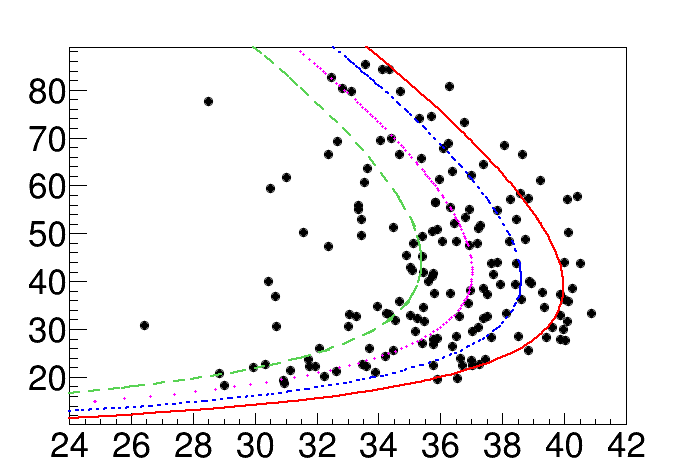

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [26]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(24, 42.);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(10.1 , 89); 
//T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(20, 41.);
//T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(5 , 35); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1.);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1E_newtheta_new_bydstar_allmnt->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_allmnt->SetMarkerSize(0.8);
T1E_newtheta_new_bydstar_allmnt->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allmnt->Draw("samep");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(4);
T1Etheta_B14He3_8000->SetMarkerColor(6);
T1Etheta_B14He3_10000->SetMarkerColor(8);
T1Etheta_B14He3_13200->SetMarkerColor(2);

T1Etheta_B14He3_0->SetLineStyle(1);
T1Etheta_B14He3_654->SetLineStyle(2);
T1Etheta_B14He3_8000->SetLineStyle(3);
T1Etheta_B14He3_10000->SetLineStyle(9);
T1Etheta_B14He3_0->SetLineWidth(2);
T1Etheta_B14He3_654->SetLineWidth(2);
T1Etheta_B14He3_8000->SetLineWidth(2);
T1Etheta_B14He3_10000->SetLineWidth(2);
T1Etheta_B14He3_0->SetLineColor(2);
T1Etheta_B14He3_654->SetLineColor(4);
T1Etheta_B14He3_8000->SetLineColor(6);
T1Etheta_B14He3_10000->SetLineColor(8);
T1Etheta_B14He3_0->Draw("C same");
T1Etheta_B14He3_654->Draw("C same");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("C same");

//T1Etheta_B14He3_0->Draw("samep");
//T1Etheta_B14He3_654->Draw("samep");
//T1Etheta_B14He3_8000->Draw("samep");
//T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");

T1Etheta_B14He3_d4He->SetMarkerStyle(6);
T1Etheta_B14He3_d4He->SetMarkerColor(4);
//T1Etheta_B14He3_d4He->Draw("samep");

   //TText* textT1E_newtheta_new_bydstar_all = new TText(29, 70, Form("%d", T1E_newtheta_new_bydstar_allm->GetN()));
   //textT1E_newtheta_new_bydstar_all->SetTextAlign(15); // 设置文本对齐方式
   //textT1E_newtheta_new_bydstar_all->SetTextSize(0.08); // 设置文本大小
   //textT1E_newtheta_new_bydstar_all->Draw("samep"); // 在图上显示文本
   //textT1E_newtheta_new_bydstar_allnt->Draw("samep");
c2->SetLogy(0);
c2->Draw();

In [27]:
c2->Clear();
//q_all->Fit("g1","","",0.,3.);
q_allm->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
//c2->Draw();

In [28]:
c2->Clear();
T1E_newtheta_new_bydstar_allm->GetXaxis()->SetLimits(17, 49);
T1E_newtheta_new_bydstar_allm->GetYaxis()->SetRangeUser(0 , 60); 
T1E_newtheta_new_bydstar_allm->SetMarkerStyle(3);
T1E_newtheta_new_bydstar_allm->SetMarkerSize(1);
T1E_newtheta_new_bydstar_allm->SetMarkerColor(1);
T1E_newtheta_new_bydstar_allm->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(2);
T1Etheta_B14He3_8000->SetMarkerColor(2);
T1Etheta_B14He3_10000->SetMarkerColor(2);
T1Etheta_B14He3_13200->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
T1Etheta_B14He3_13200->Draw("samep");

c2->SetLogy(0);
//c2->Draw();

In [29]:
c2->Clear();
//q_allm->Fit("g1","","",2.,3.8);
q_allm->Draw();
gStyle->SetOptStat(1);
c2->SetLogy(0);
//c2->Draw();

In [30]:
c2->Clear();
//q_allm->Fit("g1","","",2.,3.8);
q_allm1->Draw();
gStyle->SetOptStat(1);
c2->SetLogy(0);
//c2->Draw();

In [31]:
c2->Clear();
//q_allm->Fit("g1","","",2.,3.8);
q_allm2->Draw();
gStyle->SetOptStat(1);
c2->SetLogy(0);
//c2->Draw();

In [32]:
c2->Clear();
//q_allm->Fit("g1","","",2.,3.8);
q_allm3->Draw();
gStyle->SetOptStat(1);
c2->SetLogy(0);
//c2->Draw();

In [33]:
c2->Clear();
/*
//①
q_allm->Draw("HIST"); // 原色线条
q_allm->SetFillStyle(1001);            // 交叉线填充
q_allmtemp->SetFillColor(kRed);
q_allmtemp->SetFillColorAlpha(kRed, 0.5);  // 半透明红色
q_allmtemp->SetFillStyle(3003);            // 交叉线填充
q_allmtemp->SetLineColor(kRed);            // 轮廓线为红色
q_allmtemp->SetLineWidth(1);               // 加粗轮廓线
q_allmtemp->Draw("HIST SAME"); //
*/   
/*  //②
q_allm->SetLineColor(kBlue+2);      // 深蓝色
q_allm->SetLineWidth(2);            // 加粗轮廓线
q_allm->SetFillStyle(0);            // 不填充（仅轮廓）

// 设置 q_t 样式（半透明红色填充+红色轮廓）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetLineWidth(2);               // 加粗轮廓线
q_allmtemp->SetFillColorAlpha(kRed, 0.4);  // 40%透明红色填充
*/
  //③
// 设置 q_allm 样式（黑色轮廓）

q_allm->SetLineColor(kBlack);       // 黑色轮廓
q_allm->SetLineWidth(2);            // 加粗
q_allm->SetFillStyle(0);            // 无填充

// 设置 q_t 样式（蓝色交叉线填充）
q_allmtemp->SetLineColor(kBlue);           // 蓝色轮廓
q_allmtemp->SetLineWidth(2);
q_allmtemp->SetFillColor(kBlue);           // 填充颜色
q_allmtemp->SetFillStyle(3003);            // 交叉线填充

// 绘制顺序
q_allm->Draw("HIST");    // 先绘制总分布
q_allmtemp->Draw("HIST SAME");  // 叠加 q_t

/*
// 设置 q_allm 样式（浅灰色填充+深灰轮廓）
q_allm->SetLineColor(kGray+2);      // 深灰色轮廓
q_allm->SetFillColor(kGray);        // 浅灰色填充
q_allm->SetFillStyle(1001);         // 实心填充

// 设置 q_t 样式（红色点阵填充）
q_allmtemp->SetLineColor(kRed);            // 红色轮廓
q_allmtemp->SetFillColor(kRed);            
q_allmtemp->SetFillStyle(3007);            // 密集点阵填充

// 绘制时调整 Y 轴范围（避免 q_allm 填充覆盖 q_t）
q_allm->Draw("HIST");
q_allm->GetYaxis()->SetRangeUser(0, 1.2*q_allm->GetMaximum());
q_allmtemp->Draw("HIST SAME");
*/


gStyle->SetOptStat(0);
c2->SetLogy(0);
//c2->Draw();

In [34]:
c2->Clear();
//q_nt->Fit("g1","","",0.,4.5);
q_nt->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
//c2->Draw();

In [35]:
Double_t an,an2,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17;
TF1 *fun3 = new TF1("fun3","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/[5])^2)+[6]*TMath::Exp(-0.5*((x-[7])/[8])^2)+[9]*TMath::Exp(-0.5*((x-[10])/[11])^2)",0.,10.);
  fun3->SetParameter(0,8);
  fun3->SetParameter(1,1.8);
  fun3->SetParameter(2,0.7);
  fun3->SetParameter(3,5);
  fun3->SetParameter(4,3.5);
  fun3->SetParLimits(4,3,4.);
  fun3->SetParameter(5,0.5);
  fun3->SetParLimits(5,0.4,1.2);
  fun3->SetParameter(6,10);
  fun3->SetParameter(7,5.8);
  fun3->SetParameter(8,0.5);
  fun3->SetParLimits(8,0.2,1.);
  fun3->SetParameter(9,10);
  fun3->SetParameter(10,7.2);
  fun3->SetParameter(11,0.5);
  fun3->SetParLimits(11,0.2,1.5);
q_allm->Fit("fun3","RL");
q_allm->Draw();
//q_t0->Fit("fun3","RL");
//q_t0->Draw();
  TF1 *fit3 = q_allm->GetFunction("fun3");
   a0 = fit3->GetParameter(0);
   a1 = fit3->GetParameter(1);
   a2 = fit3->GetParameter(2);
   a3 = fit3->GetParameter(3);
   a4 = fit3->GetParameter(4);
   a5 = fit3->GetParameter(5);
   a6 = fit3->GetParameter(6);
   a7 = fit3->GetParameter(7);
   a8 = fit3->GetParameter(8);
   a9 = fit3->GetParameter(9);
   a10 = fit3->GetParameter(10);
   a11 = fit3->GetParameter(11);
   //a6 = fit3->GetParameter(6);
TString name_taff1= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a0,a1,a2);
TF1 *taff1=new TF1("taff1",name_taff1.Data(),a1-3*a2,a1+3*a2);
TString name_taff2= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a3,a4,a5);
TF1 *taff2=new TF1("taff2",name_taff2.Data(),a4-3*a5,a4+3*a5);
TString name_taff3= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a6,a7,a8);
TF1 *taff3=new TF1("taff3",name_taff3.Data(),a7-3*a8,a7+3*a8);
TString name_taff4= TString::Format("%f*TMath::Exp(-0.5*((x-%f)/%f)^2)",a9,a10,a11);
TF1 *taff4=new TF1("taff4",name_taff4.Data(),a10-3*a11,a10+3*a11);
taff1->SetLineColor(kBlue);
taff1->SetLineWidth(1);
taff1->Draw("same");
taff2->SetLineColor(kBlue);
taff2->SetLineWidth(1);
taff2->Draw("same");
taff3->SetLineColor(kBlue);
taff3->SetLineWidth(1);
taff3->Draw("same");
taff4->SetLineColor(kBlue);
taff4->SetLineWidth(1);
taff4->Draw("same");
q_allm->Draw("same");
//q_t0->Draw("same");
gStyle->SetOptStat(0);
c2->SetLogy(0);
//c2->Draw();


Double_t thechi2 = fit3 ->GetChisquare();
    Int_t thendf = fit3 ->GetNDF();
    std::cout << "Chi-squared: " << thechi2 << std::endl;
    std::cout << "NDF: " << thendf << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2 / thendf << std::endl;


 FCN=1.90534 FROM MIGRAD    STATUS=CONVERGED    2427 CALLS        2428 TOTAL
                     EDM=5.79638e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.84456e+00   1.96548e+00   1.55550e-03   1.86857e-05
   2  p1           1.79025e+00   3.08006e-01   2.11979e-04   3.05094e-04
   3  p2           9.59959e-01   3.15399e-01   1.69158e-04   5.73822e-05
   4  p3           7.38080e+00   3.99248e+00   2.57707e-03  -8.92066e-06
   5  p4           3.52716e+00   2.32391e-01   3.59823e-04  -3.58448e-05
   6  p5           4.00000e-01   7.20634e-01   2.39423e-03** at limit **
   7  p6           1.14581e+01   5.76804e+00   2.46199e-03  -1.06086e-04
   8  p7           5.30967e+00   2.33125e-01   1.62103e-04  -1.66695e-03
   9  p8           6.11348e-01   3.22067e-01   3.16265e-04  -8.81307e-04
  10  p9           7.87307e+00   1.72446e+

In [36]:
Double_t fitfuncbw(Double_t *x,Double_t *par){//14
   Double_t exps=0.70; 
  //Double_t phbck = psfunc62(x,par);
  //Double_t gausspeak[5];
  //gausspeak[0] = par[1]*exp(-0.5*((x[0]-par[2])/0.423)*((x[0]-par[2])/0.423));
  //gausspeak[1] = par[3]*exp(-0.5*((x[0]-par[4])/0.414)*((x[0]-par[4])/0.414));

  Double_t bw[4];
  if(x[0]>0.9696){
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, par[2] *sqrt(x[0]-0.9696));
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, par[5] *sqrt(x[0]-0.9696));
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, par[8] *sqrt(x[0]-0.9696));
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,par[11]*sqrt(x[0]-0.9696));
  }
  else{
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, 0);
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, 0);
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, 0);
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,0);
  }
//phbck+gausspeak[0]+gausspeak[1]+
  return bw[0]+bw[1]+bw[2]+bw[3];

}
   Double_t exps=0.70; 

In [37]:
Double_t fitfuncbwa(Double_t *x,Double_t *par){//14
   Double_t exps=0.70; 
  //Double_t phbck = psfunc62(x,par);
  //Double_t gausspeak[5];
  //gausspeak[0] = par[1]*exp(-0.5*((x[0]-par[2])/0.423)*((x[0]-par[2])/0.423));
  //gausspeak[1] = par[3]*exp(-0.5*((x[0]-par[4])/0.414)*((x[0]-par[4])/0.414));

  Double_t bw[5];
  if(x[0]>0.9696){
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, par[2] *sqrt(x[0]-0.9696));
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, par[5] *sqrt(x[0]-0.9696));
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, par[8] *sqrt(x[0]-0.9696));
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,par[11]*sqrt(x[0]-0.9696));
  }
  else{
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, 0);
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, 0);
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, 0);
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,0);
  }
    bw[4] = par[12]*TMath::Voigt(x[0]-par[13],exps,0);
//phbck+gausspeak[0]+gausspeak[1]+
  return bw[0]+bw[1]+bw[2]+bw[3]+bw[4];

}
   exps=0.70; 

In [38]:
Double_t fitfuncbw2(Double_t *x,Double_t *par){//14
   Double_t exps=0.70; 
  //Double_t phbck = psfunc62(x,par);
  //Double_t gausspeak[5];
  //gausspeak[0] = par[1]*exp(-0.5*((x[0]-par[2])/0.423)*((x[0]-par[2])/0.423));
  //gausspeak[1] = par[3]*exp(-0.5*((x[0]-par[4])/0.414)*((x[0]-par[4])/0.414));

  Double_t bw[5];
  if(x[0]>0.9696){
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, par[2] *sqrt(x[0]-0.9696));
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, par[5] *sqrt(x[0]-0.9696));
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, par[8] *sqrt(x[0]-0.9696));
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,par[11]*sqrt(x[0]-0.9696));
    bw[4] = par[12]*TMath::Voigt(x[0]-par[13],exps,par[14]*sqrt(x[0]-0.9696));
  }
  else{
    bw[0] = par[0]*TMath::Voigt(x[0]-par[1],exps, 0);
    bw[1] = par[3]*TMath::Voigt(x[0]-par[4],exps, 0);
    bw[2] = par[6]*TMath::Voigt(x[0]-par[7],exps, 0);
    bw[3] = par[9]*TMath::Voigt(x[0]-par[10],exps,0);
    bw[4] = par[12]*TMath::Voigt(x[0]-par[13],exps,0);
  }
//phbck+gausspeak[0]+gausspeak[1]+
  return bw[0]+bw[1]+bw[2]+bw[3]+bw[4];

}

In [39]:
c2->Clear();
Double_t si1800=0.75;
//q_t0->Fit("g1","","",0.,4.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],0.788,[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],[12],[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],[12],[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],[12],[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],[12],[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))",0.9697,10.);

      TF1 *fun3bw = new TF1("fun3bw",fitfuncbw,-0.,10.,12);



  fun3bw->SetParameter(0,8);
  fun3bw->SetParameter(1,1.8);
  fun3bw->SetParLimits(1,1.8,1.8);
  //fun3bw->SetParameter(2,1.097*si1800);
  //fun3bw->SetParLimits(2,1.097*si1800,1.097*si1800);

  fun3bw->SetParameter(3,0.0000001);
  fun3bw->SetParLimits(3,0.0000001,0.0000001);
  fun3bw->SetParameter(4,3.68);
  fun3bw->SetParLimits(4,3.18,4.18);
//  fun3bw->SetParameter(5,0.00001);
//  fun3bw->SetParLimits(5,0.00000001,0.05);

  fun3bw->SetParameter(6,10);
  fun3bw->SetParameter(7,5.78);
  //fun3bw->SetParLimits(7,5.28,6.28);
//  fun3bw->SetParameter(8,0.5);
//  fun3bw->SetParLimits(8,0.2,1.);

  fun3bw->SetParameter(9,10);
  fun3bw->SetParameter(10,8.27);
  //fun3bw->SetParLimits(10,7.77,8.77);
//  fun3bw->SetParameter(11,0.5);
//  fun3bw->SetParLimits(11,0.2,1.5);
  //fun3bw->SetParameter(12,0.78);
  //fun3bw->SetParLimits(12,0.5,1.5);

//q_allm->Fit("fun3bw","RL");
q_allm->Fit("fun3bw","SL","",-0.,10.);
q_allm->Draw();

  TF1 *fit3bw = q_allm->GetFunction("fun3bw");
   a0 = fit3bw->GetParameter(0);
   a1 = fit3bw->GetParameter(1);
   a2 = fit3bw->GetParameter(2);
   a3 = fit3bw->GetParameter(3);
   a4 = fit3bw->GetParameter(4);
   a5 = fit3bw->GetParameter(5);
   a6 = fit3bw->GetParameter(6);
   a7 = fit3bw->GetParameter(7);
   a8 = fit3bw->GetParameter(8);
   a9 = fit3bw->GetParameter(9);
   a10 = fit3bw->GetParameter(10);
   a11 = fit3bw->GetParameter(11);
   a12 = exps;//fit3bw->GetParameter(12);
TString name_taff1gs= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gs=new TF1("taff1gs",name_taff1gs.Data(),-2,0.9696);
TString name_taff1bw= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bw=new TF1("taff1bw",name_taff1bw.Data(),0.9697,a1+10);
TString name_taff2bw= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bw=new TF1("taff2bw",name_taff2bw.Data(),0.9697,a4+10);
TString name_taff3bw= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bw=new TF1("taff3bw",name_taff3bw.Data(),0.9697,15.);
TString name_taff4bw= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bw=new TF1("taff4bw",name_taff4bw.Data(),0.9697,15.);
taff1gs->SetLineColor(kBlue);
taff1gs->SetLineWidth(1);
taff1gs->Draw("same");
taff1bw->SetLineColor(kBlue);
taff1bw->SetLineWidth(1);
taff1bw->Draw("same");
taff2bw->SetLineColor(kBlue);
taff2bw->SetLineWidth(1);
taff2bw->Draw("same");
taff3bw->SetLineColor(kBlue);
taff3bw->SetLineWidth(1);
taff3bw->Draw("same");
taff4bw->SetLineColor(kBlue);
taff4bw->SetLineWidth(1);
taff4bw->Draw("same");
q_allm->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
//c2->Draw();


Double_t thechi2bw = fit3bw ->GetChisquare();
    Int_t thendfbw = fit3bw ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bw << std::endl;
    std::cout << "NDF: " << thendfbw << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bw / thendfbw << std::endl;

 FCN=22.7774 FROM MIGRAD    STATUS=CONVERGED     725 CALLS         726 TOTAL
                     EDM=3.89392e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.31337e+01   1.87471e+00  -4.89113e-05  -4.12013e-04
   2  p1           1.80000e+00     fixed    
   3  p2           2.51743e-05   6.66875e-07  -6.02129e-10  -2.15681e+01
   4  p3           1.00000e-07     fixed    
   5  p4           3.38431e+00   5.18558e-01  -3.69697e-03   4.80762e-09
   6  p5           2.69191e-02   1.76171e+01   2.43366e-08  -7.77070e-10
   7  p6           3.00784e+01   2.99526e+00  -1.19325e-03   7.51483e-05
   8  p7           5.17125e+00   1.13958e-01  -1.41763e-05  -3.77885e-03
   9  p8           2.56053e-05   5.26989e-07   4.20648e-10  -4.32730e+01
  10  p9           1.99185e+01   2.94367e+00  -5.15202e-04   1.08483e-04
  11  p10   

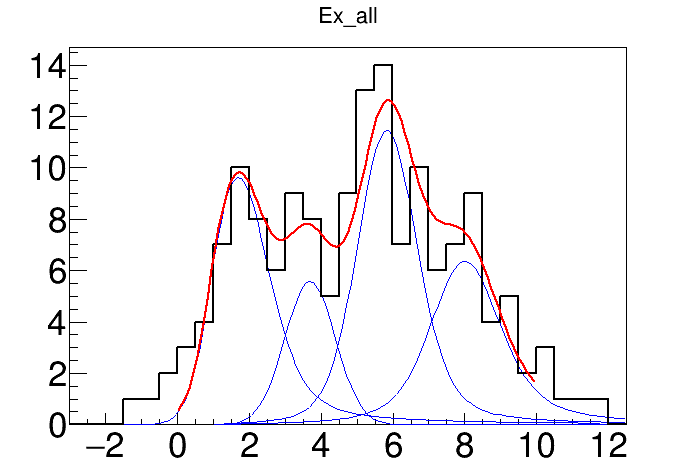

 FCN=4.73005 FROM MIGRAD    STATUS=CONVERGED     361 CALLS         362 TOTAL
                     EDM=9.16476e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   8.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.17997e+01   4.08826e+00  -3.85427e-03   9.59166e-06
   2  p1           1.80000e+00     fixed    
   3  p2           5.48500e-01     fixed    
   4  p3           9.79615e+00   5.28729e+00  -3.26878e-04  -2.68503e-03
   5  p4           3.69255e+00   2.76051e-01  -6.77309e-03  -4.46725e-04
   6  p5           1.00000e-06     fixed    
   7  p6           2.70735e+01   1.71208e+01   4.43199e-02  -1.92934e-04
   8  p7           5.85000e+00     fixed    
   9  p8           2.59342e-01   5.98605e-01   3.54372e-03   9.23397e-04
  10  p9           1.91623e+01   1.05968e+01  -2.19369e-02  -6.15206e-05
  11  p10          8.03000e+00     fixed    
  12  p11          4.24

In [40]:

      TF1 *fun3bwn = new TF1("fun3bwn",fitfuncbw,-0.,10.,12);

q_allm->GetXaxis()->SetRangeUser(-3, 12);
q_allm->GetXaxis()->SetLabelSize(0.08);  // 放大X轴数字字体
q_allm->GetYaxis()->SetLabelSize(0.08);  // 可选：同时放大Y轴字体
si1800=0.5;
  fun3bwn->SetParameter(0,8);
  fun3bwn->SetParameter(1,1.8);
  fun3bwn->SetParLimits(1,1.8,1.8);
  fun3bwn->SetParameter(2,1.097*si1800);
  fun3bwn->SetParLimits(2,1.097*si1800,1.097*si1800);

  fun3bwn->SetParameter(3,6.);
  fun3bwn->SetParLimits(3,0.1,100.);
  fun3bwn->SetParameter(4,3.68);
  fun3bwn->SetParLimits(4,3.48,3.88);
  fun3bwn->SetParameter(5,0.000001);
  fun3bwn->SetParLimits(5,0.000001,0.000001);

  fun3bwn->SetParameter(6,10);
  fun3bwn->SetParameter(7,5.85);
  fun3bwn->SetParLimits(7,5.85,5.85);
  fun3bwn->SetParameter(8,0.05);
  fun3bwn->SetParLimits(8,0.001,1.);
/*
  fun3bwn->SetParameter(9,10);
  fun3bwn->SetParameter(10,6.96);
  fun3bwn->SetParLimits(10,6.5,7.5);
*/
  fun3bwn->SetParameter(9,10);
  fun3bwn->SetParameter(10,8.03);
  fun3bwn->SetParLimits(10,8.03,8.03);
  fun3bwn->SetParameter(11,0.05);
  fun3bwn->SetParLimits(11,0.001,1.5);
  //fun3bw->SetParameter(12,0.78);
  //fun3bw->SetParLimits(12,0.5,1.5);

//q_allm->Fit("fun3bw","RL");
q_allm->Fit("fun3bwn","SL","",-0.,10.);
q_allm->Draw();

  TF1 *fit3bwn = q_allm->GetFunction("fun3bwn");
   a0 = fit3bwn->GetParameter(0);
   a1 = fit3bwn->GetParameter(1);
   a2 = fit3bwn->GetParameter(2);
   a3 = fit3bwn->GetParameter(3);
   a4 = fit3bwn->GetParameter(4);
   a5 = fit3bwn->GetParameter(5);
   a6 = fit3bwn->GetParameter(6);
   a7 = fit3bwn->GetParameter(7);
   a8 = fit3bwn->GetParameter(8);
   a9 = fit3bwn->GetParameter(9);
   a10 = fit3bwn->GetParameter(10);
   a11 = fit3bwn->GetParameter(11);
//   a12 = fit3bwn->GetParameter(12);
//   a13 = fit3bwn->GetParameter(13);
//   a14 = fit3bwn->GetParameter(14);
   a12 = exps;
TString name_taff1gsn= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gsn=new TF1("taff1gsn",name_taff1gsn.Data(),-2,0.9696);
TString name_taff1bwn= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bwn=new TF1("taff1bwn",name_taff1bwn.Data(),0.9697,a1+10);
TString name_taff2bwn= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bwn=new TF1("taff2bwn",name_taff2bwn.Data(),0.9697,a4+10);
TString name_taff3bwn= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bwn=new TF1("taff3bwn",name_taff3bwn.Data(),0.9697,15.);
TString name_taff4bwn= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bwn=new TF1("taff4bwn",name_taff4bwn.Data(),0.9697,15.);
//TString name_taff5bwn= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a12,a13,a12,a14);
//TF1 *taff5bwn=new TF1("taff5bwn",name_taff5bwn.Data(),0.9697,15.);
taff1gsn->SetLineColor(kBlue);
taff1gsn->SetLineWidth(1);
taff1gsn->Draw("same");
taff1bwn->SetLineColor(kBlue);
taff1bwn->SetLineWidth(1);
taff1bwn->Draw("same");
taff2bwn->SetLineColor(kBlue);
taff2bwn->SetLineWidth(1);
taff2bwn->Draw("same");
taff3bwn->SetLineColor(kBlue);
taff3bwn->SetLineWidth(1);
taff3bwn->Draw("same");
taff4bwn->SetLineColor(kBlue);
taff4bwn->SetLineWidth(1);
taff4bwn->Draw("same");
//taff5bwn->SetLineColor(kBlue);
//taff5bwn->SetLineWidth(1);
//taff5bwn->Draw("same");
q_allm->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
c2->Draw();


Double_t thechi2bwn = fit3bwn ->GetChisquare();
    Int_t thendfbwn = fit3bwn ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bwn << std::endl;
    std::cout << "NDF: " << thendfbwn << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bwn / thendfbwn << std::endl;

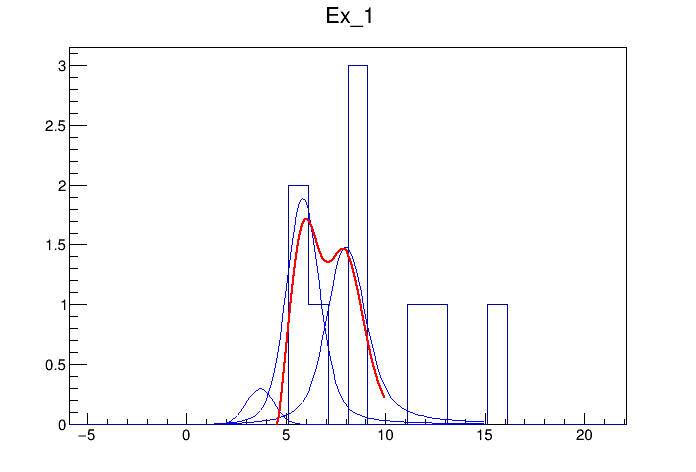

 FCN=3.01611 FROM MIGRAD    STATUS=FAILED        443 CALLS         444 TOTAL
                     EDM=0.000729768    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.19748e+01   1.51498e+01   0.00000e+00   1.12650e-02
   2  p1           1.80000e+00     fixed    
   3  p2           5.48500e-01     fixed    
   4  p3           5.24252e-01   1.78721e+00  -0.00000e+00   6.53088e-01
   5  p4           3.69000e+00     fixed    
   6  p5           1.00000e-06     fixed    
   7  p6           4.46764e+00   2.43429e-01   0.00000e+00   6.43449e-03
   8  p7           5.85000e+00     fixed    
   9  p8           2.59342e-01     fixed    
  10  p9           4.47709e+00   1.54322e+00   0.00000e+00  -6.35922e-03
  11  p10          8.03000e+00     fixed    
  12  p11          4.24797e-01     fixed    
                               ERR DEF= 0.5
Chi

Warning in <Fit>: Abnormal termination of minimization.


In [41]:
c2->Clear();
//q_t0->Fit("g1","","",0.,4.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],0.788,[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],[12],[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],[12],[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],[12],[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],[12],[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))",0.9697,10.);

      TF1 *fun3bw1 = new TF1("fun3bw1",fitfuncbw,-0.,10.,12);



  fun3bw1->SetParameter(0,1.5);
  fun3bw1->SetParameter(1,1.8);
  fun3bw1->SetParLimits(1,1.8,1.8);
  fun3bw1->SetParameter(2,0.5485);
  fun3bw1->SetParLimits(2,0.5485,0.5485);

  fun3bw1->SetParameter(3,2.5);
  fun3bw1->SetParLimits(3,0.1,100.);
  fun3bw1->SetParameter(4,3.69);
  fun3bw1->SetParLimits(4,3.69,3.69);
  fun3bw1->SetParameter(5,0.000001);
  fun3bw1->SetParLimits(5,0.000001,0.000001);

  fun3bw1->SetParameter(6,3);
  fun3bw1->SetParameter(7,5.85);
  fun3bw1->SetParLimits(7,5.85,5.85);
  fun3bw1->SetParameter(8,0.259342);
  fun3bw1->SetParLimits(8,0.259342,0.259342);

  fun3bw1->SetParameter(9,4);
  fun3bw1->SetParameter(10,8.03);
  fun3bw1->SetParLimits(10,8.03,8.03);
  fun3bw1->SetParameter(11,0.424797);
  fun3bw1->SetParLimits(11,0.424797,0.424797);

//q_allm->Fit("fun3bw","RL");
q_allm1->Fit("fun3bw1","SL","",-0.,10.);
q_allm1->Draw();

  TF1 *fit3bw1 = q_allm1->GetFunction("fun3bw1");
   a0 = fit3bw1->GetParameter(0);
   a1 = 1.8;
   a2 = fit3bw1->GetParameter(2);
   a3 = fit3bw1->GetParameter(3);
   a4 = fit3bw1->GetParameter(4);
   a5 = fit3bw1->GetParameter(5);
   a6 = fit3bw1->GetParameter(6);
   a7 = fit3bw1->GetParameter(7);
   a8 = fit3bw1->GetParameter(8);
   a9 = fit3bw1->GetParameter(9);
   a10 = fit3bw1->GetParameter(10);
   a11 = fit3bw1->GetParameter(11);
   a12 = exps;//fit3bw->GetParameter(12);
TString name_taff1gs1= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gs1=new TF1("taff1gs1",name_taff1gs1.Data(),-2,0.9696);
TString name_taff1bw1= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bw1=new TF1("taff1bw1",name_taff1bw1.Data(),0.9697,a1+10);
TString name_taff2bw1= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bw1=new TF1("taff2bw1",name_taff2bw1.Data(),0.9697,a4+10);
TString name_taff3bw1= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bw1=new TF1("taff3bw1",name_taff3bw1.Data(),0.9697,15.);
TString name_taff4bw1= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bw1=new TF1("taff4bw1",name_taff4bw1.Data(),0.9697,15.);
taff1gs1->SetLineColor(kBlue);
taff1gs1->SetLineWidth(1);
taff1gs1->Draw("same");
taff1bw1->SetLineColor(kBlue);
taff1bw1->SetLineWidth(1);
taff1bw1->Draw("same");
taff2bw1->SetLineColor(kBlue);
taff2bw1->SetLineWidth(1);
taff2bw1->Draw("same");
taff3bw1->SetLineColor(kBlue);
taff3bw1->SetLineWidth(1);
taff3bw1->Draw("same");
taff4bw1->SetLineColor(kBlue);
taff4bw1->SetLineWidth(1);
taff4bw1->Draw("same");
q_allm1->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
c2->Draw();


Double_t thechi2bw1 = fit3bw1 ->GetChisquare();
    Int_t thendfbw1 = fit3bw1 ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bw1 << std::endl;
    std::cout << "NDF: " << thendfbw1 << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bw1 / thendfbw1 << std::endl;

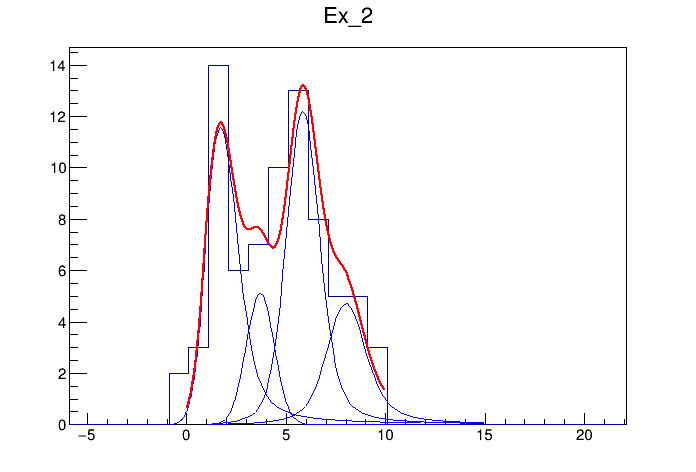

 FCN=1.89345 FROM MIGRAD    STATUS=CONVERGED     194 CALLS         195 TOTAL
                     EDM=1.40913e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.62235e+01   5.90958e+00   6.09912e-03  -4.40760e-05
   2  p1           1.80000e+00     fixed    
   3  p2           5.48500e-01     fixed    
   4  p3           8.98902e+00   4.64066e+00   1.64403e-04  -8.98411e-04
   5  p4           3.69000e+00     fixed    
   6  p5           1.00000e-06     fixed    
   7  p6           2.88687e+01   6.91361e+00   6.86984e-03  -8.60969e-06
   8  p7           5.85000e+00     fixed    
   9  p8           2.59342e-01     fixed    
  10  p9           1.42097e+01   5.23927e+00   5.37200e-03  -5.40833e-05
  11  p10          8.03000e+00     fixed    
  12  p11          4.24797e-01     fixed    
                               ERR DEF= 0.5
26.

In [42]:
c2->Clear();
//q_t0->Fit("g1","","",0.,4.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],0.788,[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],[12],[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],[12],[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],[12],[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],[12],[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))",0.9697,10.);

      TF1 *fun3bw2 = new TF1("fun3bw2",fitfuncbw,-0.,10.,12);



  fun3bw2->SetParameter(0,1.5);
  fun3bw2->SetParameter(1,1.8);
  fun3bw2->SetParLimits(1,1.8,1.8);
  fun3bw2->SetParameter(2,0.5485);
  fun3bw2->SetParLimits(2,0.5485,0.5485);

  fun3bw2->SetParameter(3,2.5);
  fun3bw2->SetParLimits(3,0.1,100.);
  fun3bw2->SetParameter(4,3.69);
  fun3bw2->SetParLimits(4,3.69,3.69);
  fun3bw2->SetParameter(5,0.000001);
  fun3bw2->SetParLimits(5,0.000001,0.000001);

  fun3bw2->SetParameter(6,3);
  fun3bw2->SetParameter(7,5.85);
  fun3bw2->SetParLimits(7,5.85,5.85);
  fun3bw2->SetParameter(8,0.259342);
  fun3bw2->SetParLimits(8,0.259342,0.259342);

  fun3bw2->SetParameter(9,4);
  fun3bw2->SetParameter(10,8.03);
  fun3bw2->SetParLimits(10,8.03,8.03);
  fun3bw2->SetParameter(11,0.424797);
  fun3bw2->SetParLimits(11,0.424797,0.424797);
//q_allm->Fit("fun3bw","RL");
q_allm2->Fit("fun3bw2","SL","",-0.,10.);
q_allm2->Draw();

  TF1 *fit3bw2 = q_allm2->GetFunction("fun3bw2");
   a0 = fit3bw2->GetParameter(0);
   a1 = 1.8;
   a2 = fit3bw2->GetParameter(2);
   a3 = fit3bw2->GetParameter(3);
   a4 = fit3bw2->GetParameter(4);
   a5 = fit3bw2->GetParameter(5);
   a6 = fit3bw2->GetParameter(6);
   a7 = fit3bw2->GetParameter(7);
   a8 = fit3bw2->GetParameter(8);
   a9 = fit3bw2->GetParameter(9);
   a10 = fit3bw2->GetParameter(10);
   a11 = fit3bw2->GetParameter(11);
   a12 = exps;//fit3bw->GetParameter(12);
cout<<a0<<'\t'<<a1<<'\t'<<a2<<'\t'<<a12<<'\n';
TString name_taff1gs2= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gs2=new TF1("taff1gs2",name_taff1gs2.Data(),-2,0.9696);
TString name_taff1bw2= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bw2=new TF1("taff1bw2",name_taff1bw2.Data(),0.9697,a1+10);
TString name_taff2bw2= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bw2=new TF1("taff2bw2",name_taff2bw2.Data(),0.9697,a4+10);
TString name_taff3bw2= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bw2=new TF1("taff3bw2",name_taff3bw2.Data(),0.9697,15.);
TString name_taff4bw2= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bw2=new TF1("taff4bw2",name_taff4bw2.Data(),0.9697,15.);
taff1gs2->SetLineColor(kBlue);
taff1gs2->SetLineWidth(1);
taff1gs2->Draw("same");
taff1bw2->SetLineColor(kBlue);
taff1bw2->SetLineWidth(1);
taff1bw2->Draw("same");
taff2bw2->SetLineColor(kBlue);
taff2bw2->SetLineWidth(1);
taff2bw2->Draw("same");
taff3bw2->SetLineColor(kBlue);
taff3bw2->SetLineWidth(1);
taff3bw2->Draw("same");
taff4bw2->SetLineColor(kBlue);
taff4bw2->SetLineWidth(1);
taff4bw2->Draw("same");
q_allm2->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
c2->Draw();


Double_t thechi2bw2 = fit3bw2 ->GetChisquare();
    Int_t thendfbw2 = fit3bw2 ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bw2 << std::endl;
    std::cout << "NDF: " << thendfbw2 << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bw2 / thendfbw2 << std::endl;

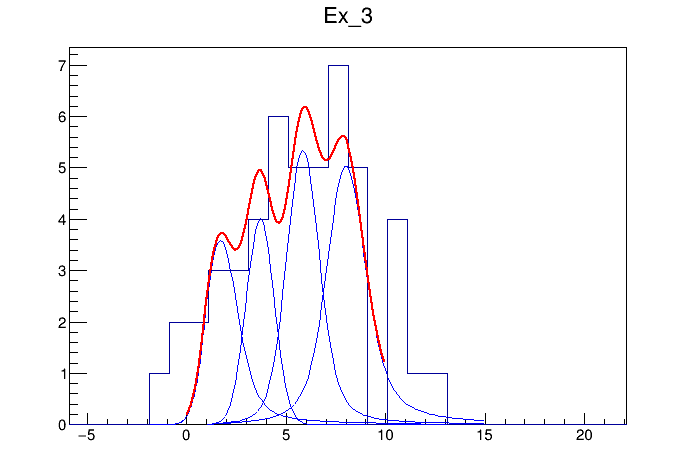

 FCN=3.05315 FROM MIGRAD    STATUS=CONVERGED     137 CALLS         138 TOTAL
                     EDM=5.92044e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.13481e+00   3.40383e+00   4.31867e-03  -4.52608e-05
   2  p1           1.80000e+00     fixed    
   3  p2           5.48500e-01     fixed    
   4  p3           7.03700e+00   3.68919e+00   1.77383e-04  -2.23963e-04
   5  p4           3.69000e+00     fixed    
   6  p5           1.00000e-06     fixed    
   7  p6           1.26399e+01   5.09929e+00   6.03078e-03  -3.83427e-05
   8  p7           5.85000e+00     fixed    
   9  p8           2.59342e-01     fixed    
  10  p9           1.52117e+01   5.11704e+00   6.28988e-03  -2.69399e-05
  11  p10          8.03000e+00     fixed    
  12  p11          4.24797e-01     fixed    
                               ERR DEF= 0.5
Chi

In [43]:
c2->Clear();
//q_t0->Fit("g1","","",0.,4.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],0.788,[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],[12],[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],[12],[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],[12],[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],[12],[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))",0.9697,10.);

      TF1 *fun3bw3 = new TF1("fun3bw3",fitfuncbw,-0.,10.,12);



  fun3bw3->SetParameter(0,1.5);
  fun3bw3->SetParameter(1,1.8);
  fun3bw3->SetParLimits(1,1.8,1.8);
  fun3bw3->SetParameter(2,0.5485);
  fun3bw3->SetParLimits(2,0.5485,0.5485);

  fun3bw3->SetParameter(3,2.5);
  fun3bw3->SetParLimits(3,0.1,100.);
  fun3bw3->SetParameter(4,3.69);
  fun3bw3->SetParLimits(4,3.69,3.69);
  fun3bw3->SetParameter(5,0.000001);
  fun3bw3->SetParLimits(5,0.000001,0.000001);

  fun3bw3->SetParameter(6,3);
  fun3bw3->SetParameter(7,5.85);
  fun3bw3->SetParLimits(7,5.85,5.85);
  fun3bw3->SetParameter(8,0.259342);
  fun3bw3->SetParLimits(8,0.259342,0.259342);

  fun3bw3->SetParameter(9,4);
  fun3bw3->SetParameter(10,8.03);
  fun3bw3->SetParLimits(10,8.03,8.03);
  fun3bw3->SetParameter(11,0.424797);
  fun3bw3->SetParLimits(11,0.424797,0.424797);

//q_allm->Fit("fun3bw","RL");
q_allm3->Fit("fun3bw3","SL","",-0.,10.);
q_allm3->Draw();

  TF1 *fit3bw3 = q_allm3->GetFunction("fun3bw3");
   a0 = fit3bw3->GetParameter(0);
   a1 = 1.8;
   a2 = fit3bw3->GetParameter(2);
   a3 = fit3bw3->GetParameter(3);
   a4 = fit3bw3->GetParameter(4);
   a5 = fit3bw3->GetParameter(5);
   a6 = fit3bw3->GetParameter(6);
   a7 = fit3bw3->GetParameter(7);
   a8 = fit3bw3->GetParameter(8);
   a9 = fit3bw3->GetParameter(9);
   a10 = fit3bw3->GetParameter(10);
   a11 = fit3bw3->GetParameter(11);
   a12 = exps;//fit3bw->GetParameter(12);
TString name_taff1gs3= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gs3=new TF1("taff1gs3",name_taff1gs3.Data(),-2,0.9696);
TString name_taff1bw3= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bw3=new TF1("taff1bw3",name_taff1bw3.Data(),0.9697,a1+10);
TString name_taff2bw3= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bw3=new TF1("taff2bw3",name_taff2bw3.Data(),0.9697,a4+10);
TString name_taff3bw3= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bw3=new TF1("taff3bw3",name_taff3bw3.Data(),0.9697,15.);
TString name_taff4bw3= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bw3=new TF1("taff4bw3",name_taff4bw3.Data(),0.9697,15.);
taff1gs3->SetLineColor(kBlue);
taff1gs3->SetLineWidth(1);
taff1gs3->Draw("same");
taff1bw3->SetLineColor(kBlue);
taff1bw3->SetLineWidth(1);
taff1bw3->Draw("same");
taff2bw3->SetLineColor(kBlue);
taff2bw3->SetLineWidth(1);
taff2bw3->Draw("same");
taff3bw3->SetLineColor(kBlue);
taff3bw3->SetLineWidth(1);
taff3bw3->Draw("same");
taff4bw3->SetLineColor(kBlue);
taff4bw3->SetLineWidth(1);
taff4bw3->Draw("same");
q_allm3->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
c2->Draw();


Double_t thechi2bw3 = fit3bw3 ->GetChisquare();
    Int_t thendfbw3 = fit3bw3 ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bw3 << std::endl;
    std::cout << "NDF: " << thendfbw3 << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bw3 / thendfbw3 << std::endl;

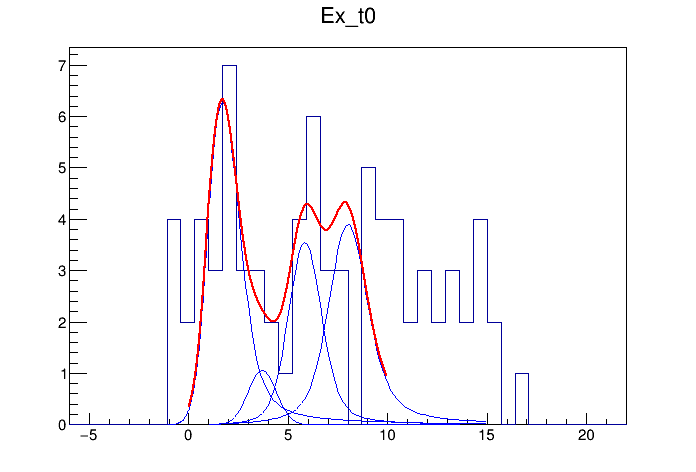

 FCN=9.94217 FROM HESSE     STATUS=FAILED         19 CALLS         419 TOTAL
                     EDM=1.54554e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.42187e+01   3.18830e+00   1.56593e-03   3.55949e-05
   2  p1           1.80000e+00     fixed    
   3  p2           5.48500e-01     fixed    
   4  p3           1.86115e+00   1.93380e+00   3.29575e-04   4.97288e-05
   5  p4           3.69000e+00     fixed    
   6  p5           1.00000e-06     fixed    
   7  p6           8.39682e+00   3.07954e+00   6.87210e-03  -1.21696e-05
   8  p7           5.85000e+00     fixed    
   9  p8           2.59342e-01     fixed    
  10  p9           1.17590e+01   3.55958e+00   7.93917e-03  -5.86074e-06
  11  p10          8.03000e+00     fixed    
  12  p11          4.24797e-01     fixed    
  13  p12         -9.13988e+04   4

In [44]:
c2->Clear();
//q_t0->Fit("g1","","",0.,4.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],0.788,[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],[12],[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],[12],[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],[12],[8]*sqrt(x-0.9696))+[9]*TMath::Voigt(x-[10],[12],[11]*sqrt(x-0.9696))",0.9697,10.);
//TF1 *fun3bw = new TF1("fun3bw","[0]*TMath::Voigt(x-[1],0.788,[2]*sqrt(x-0.9696))+[3]*TMath::Voigt(x-[4],0.788,[5]*sqrt(x-0.9696))+[6]*TMath::Voigt(x-[7],0.788,[8]*sqrt(x-0.9696))",0.9697,10.);

      TF1 *fun3bwt = new TF1("fun3bwt",fitfuncbw,0.,9.,14);



  fun3bwt->SetParameter(0,15);
  fun3bwt->SetParLimits(0,10,20);
  fun3bwt->SetParameter(1,1.8);
  fun3bwt->SetParLimits(1,1.8,1.8);
  fun3bwt->SetParameter(2,0.5485);
  fun3bwt->SetParLimits(2,0.5485,0.5485);

  fun3bwt->SetParameter(3,2.5);
  fun3bwt->SetParLimits(3,0.1,100.);
  fun3bwt->SetParameter(4,3.69);
  fun3bwt->SetParLimits(4,3.69,3.69);
  fun3bwt->SetParameter(5,0.000001);
  fun3bwt->SetParLimits(5,0.000001,0.000001);

  fun3bwt->SetParameter(6,3);
  fun3bwt->SetParameter(7,5.85);
  fun3bwt->SetParLimits(7,5.85,5.85);
  fun3bwt->SetParameter(8,0.259342);
  fun3bwt->SetParLimits(8,0.259342,0.259342);

  fun3bwt->SetParameter(9,4);
  fun3bwt->SetParameter(10,8.03);
  fun3bwt->SetParLimits(10,8.03,8.03);
  fun3bwt->SetParameter(11,0.424797);
  fun3bwt->SetParLimits(11,0.424797,0.424797);
/*
  fun3bwt->SetParameter(12,5.);
  fun3bwt->SetParameter(13,0.37);
  fun3bwt->SetParLimits(13,0.37,0.37);
*/
//q_allm->Fit("fun3bw","RL");
q_t0->Fit("fun3bwt","SL","",0.,10.);
q_t0->Draw();

  TF1 *fit3bwt = q_t0->GetFunction("fun3bwt");
   a0 = fit3bwt->GetParameter(0);
   a1 = 1.8;
   a2 = fit3bwt->GetParameter(2);
   a3 = fit3bwt->GetParameter(3);
   a4 = fit3bwt->GetParameter(4);
   a5 = fit3bwt->GetParameter(5);
   a6 = fit3bwt->GetParameter(6);
   a7 = fit3bwt->GetParameter(7);
   a8 = fit3bwt->GetParameter(8);
   a9 = fit3bwt->GetParameter(9);
   a10 = fit3bwt->GetParameter(10);
   a11 = fit3bwt->GetParameter(11);
   a12 = exps;//fit3bw->GetParameter(12);
   //a13 = fit3bwt->GetParameter(12);
   //a14 = fit3bwt->GetParameter(13);
//TString name_taff1gstn= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a13,a14,a12);
//TF1 *taff1gstn=new TF1("taff1gstn",name_taff1gstn.Data(),-2,10.);
TString name_taff1gst= TString::Format("%f*TMath::Voigt(x-%f,%f,0)",a0,a1,a12);
TF1 *taff1gst=new TF1("taff1gst",name_taff1gst.Data(),-2,0.9696);
TString name_taff1bwt= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a0,a1,a12,a2);
TF1 *taff1bwt=new TF1("taff1bwt",name_taff1bwt.Data(),0.9697,a1+10);
TString name_taff2bwt= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a3,a4,a12,a5);
TF1 *taff2bwt=new TF1("taff2bwt",name_taff2bwt.Data(),0.9697,a4+10);
TString name_taff3bwt= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a6,a7,a12,a8);
TF1 *taff3bwt=new TF1("taff3bwt",name_taff3bwt.Data(),0.9697,15.);
TString name_taff4bwt= TString::Format("%f*TMath::Voigt(x-%f,%f,%f*sqrt(x-0.9696))",a9,a10,a12,a11);
TF1 *taff4bwt=new TF1("taff4bwt",name_taff4bwt.Data(),0.9697,15.);
//taff1gstn->SetLineColor(kBlue);
//taff1gstn->SetLineWidth(1);
//taff1gstn->Draw("same");
taff1gst->SetLineColor(kBlue);
taff1gst->SetLineWidth(1);
taff1gst->Draw("same");
taff1bwt->SetLineColor(kBlue);
taff1bwt->SetLineWidth(1);
taff1bwt->Draw("same");
taff2bwt->SetLineColor(kBlue);
taff2bwt->SetLineWidth(1);
taff2bwt->Draw("same");
taff3bwt->SetLineColor(kBlue);
taff3bwt->SetLineWidth(1);
taff3bwt->Draw("same");
taff4bwt->SetLineColor(kBlue);
taff4bwt->SetLineWidth(1);
taff4bwt->Draw("same");
q_t0->Draw("same");

c2->SetLogy(0);
gStyle->SetOptStat(0);
c2->Draw();


Double_t thechi2bwt = fit3bwt ->GetChisquare();
    Int_t thendfbwt = fit3bwt ->GetNDF();
    std::cout << "Chi-squared: " << thechi2bwt << std::endl;
    std::cout << "NDF: " << thendfbwt << std::endl;
    std::cout << "Chi-squared/NDF: " << thechi2bwt / thendfbwt << std::endl;

In [45]:

TH1D *mytest=new TH1D("mt","mt",40,-20,20);
for(Int_t ii=0;ii<1;ii++)mytest->Fill(1.4);
for(Int_t ii=0;ii<5;ii++)mytest->Fill(2.1);
for(Int_t ii=0;ii<10;ii++)mytest->Fill(3.3);
for(Int_t ii=0;ii<4;ii++)mytest->Fill(4.7);
for(Int_t ii=0;ii<2;ii++)mytest->Fill(5.3);
//TF1 *testfun = new TF1("testfun","[0]*TMath::Voigt(x-[1],0.7,[2]*sqrt(x-0.9696))",1.,20.);
TF1 *testfun = new TF1("testfun","[0]*TMath::Voigt(x-[1],0.7,0)",1.,20.);

mytest->Fit("testfun","RL","",1,6);
  TF1 *ftestfun = mytest->GetFunction("testfun");
   a0 = ftestfun->GetParameter(0);
   a1 = ftestfun->GetParameter(1);
   //a2 = ftestfun->GetParameter(2);
c2->Clear();
mytest->Draw();
//TString name_ftestfun= TString::Format("%f*TMath::Voigt(x-%f,0.7,%f*sqrt(x-0.9696))",a0,a1,a2);
TString name_ftestfun= TString::Format("%f*TMath::Voigt(x-%f,0.7,0)",a0,a1);
TF1 *pftestfun=new TF1("pftestfun",name_ftestfun.Data(),1.,6.);
pftestfun->SetLineColor(kBlue);
pftestfun->SetLineWidth(1);
pftestfun->Draw("same");
mytest->Draw("same");

gStyle->SetOptStat(1);
c2->SetLogy(0);
//c2->Draw();
cout<<pftestfun->Integral(1, 8, 1e-3);


 FCN=3.75355 FROM MIGRAD    STATUS=CONVERGED     136 CALLS         137 TOTAL
                     EDM=3.77535e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.19997e+01   4.69036e+00   6.67660e-03  -1.30902e-05
   2  p1           3.54566e+00   1.49572e-01   2.13016e-04   1.60703e-05
                               ERR DEF= 0.5
21.9967

In [46]:
Double_t countS[10];
countS[0]=(taff1gsn->Integral(-5, 0.9696, 1e-3) +  taff1bwn->Integral(0.9697, 1000, 1e-3));
countS[1]=taff2bwn->Integral(0.9697, 1000, 1e-3);
countS[2]=taff3bwn->Integral(0.9697, 1000, 1e-3);
countS[3]=taff4bwn->Integral(0.9697, 1000, 1e-3);
cout << "S 1.80 = " <<(taff1gsn->Integral(-5, 0.9696, 1e-3) +  taff1bwn->Integral(0.9697, 1000, 1e-3))<< '\n';
cout << "S 3.63 = " <<taff2bwn->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "S 5.58 = " <<taff3bwn->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "S 8.05 = " <<taff4bwn->Integral(0.9697, 1000, 1e-3) << '\n';
cout<<"all="<<countS[0]+countS[1]+countS[2]+countS[3]<<'\n';

S 1.80 = 22.477
S 3.63 = 9.79566
S 5.58 = 27.0026
S 8.05 = 19.08
all=78.3552


In [47]:
Double_t counts[10][10];
counts[0][0]=(taff1gs1->Integral(-5, 0.9696, 1e-3) +  taff1bw1->Integral(0.9697, 1000, 1e-3));
counts[1][0]=taff2bw1->Integral(0.9697, 1000, 1e-3);
counts[2][0]=taff3bw1->Integral(0.9697, 1000, 1e-3);
counts[3][0]=taff4bw1->Integral(0.9697, 1000, 1e-3);
cout << "point1 S 1.80 = " <<(taff1gs1->Integral(-5, 0.9696, 1e-3) +  taff1bw1->Integral(0.9697, 1000, 1e-3))<< '\n';
cout << "point1 S 3.63 = " <<taff2bw1->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point1 S 5.58 = " <<taff3bw1->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point1 S 8.05 = " <<taff4bw1->Integral(0.9697, 1000, 1e-3) << '\n';
cout<<"point1 all="<<counts[0][0]+counts[1][0]+counts[2][0]+counts[3][0]<<'\n';

point1 S 1.80 = -32.9683
point1 S 3.63 = 0.524225
point1 S 5.58 = 4.45593
point1 S 8.05 = 4.45785
point1 all=-23.5303


In [48]:
counts[0][1]=(taff1gs2->Integral(-5, 0.9696, 1e-3) +  taff1bw2->Integral(0.9697, 1000, 1e-3));
counts[1][1]=taff2bw2->Integral(0.9697, 1000, 1e-3);
counts[2][1]=taff3bw2->Integral(0.9697, 1000, 1e-3);
counts[3][1]=taff4bw2->Integral(0.9697, 1000, 1e-3);
cout << "point2 S 1.80 = " <<(taff1gs2->Integral(-5, 0.9696, 1e-3) +  taff1bw2->Integral(0.9697, 1000, 1e-3))<< '\n';
cout << "point2 S 3.63 = " <<taff2bw2->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point2 S 5.58 = " <<taff3bw2->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point2 S 8.05 = " <<taff4bw2->Integral(0.9697, 1000, 1e-3) << '\n';
cout<<"point1 all="<<counts[0][1]+counts[1][1]+counts[2][1]+counts[3][1]<<'\n';

point2 S 1.80 = 27.0382
point2 S 3.63 = 8.98856
point2 S 5.58 = 28.793
point2 S 8.05 = 14.1486
point1 all=78.9684


In [49]:
counts[0][2]=(taff1gs3->Integral(-5, 0.9696, 1e-3) +  taff1bw3->Integral(0.9697, 1000, 1e-3));
counts[1][2]=taff2bw3->Integral(0.9697, 1000, 1e-3);
counts[2][2]=taff3bw3->Integral(0.9697, 1000, 1e-3);
counts[3][2]=taff4bw3->Integral(0.9697, 1000, 1e-3);
cout << "point3 S 1.80 = " <<(taff1gs3->Integral(-5, 0.9696, 1e-3) +  taff1bw3->Integral(0.9697, 1000, 1e-3))<< '\n';
cout << "point3 S 3.63 = " <<taff2bw3->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point3 S 5.58 = " <<taff3bw3->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "point3 S 8.05 = " <<taff4bw3->Integral(0.9697, 1000, 1e-3) << '\n';
cout<<"point1 all="<<counts[0][2]+counts[1][2]+counts[2][2]+counts[3][2]<<'\n';

point3 S 1.80 = 8.38756
point3 S 3.63 = 7.03665
point3 S 5.58 = 12.6068
point3 S 8.05 = 15.1463
point1 all=43.1773


In [50]:
Double_t t0counts[10];
t0counts[0]=(taff1gst->Integral(-5, 0.9696, 1e-3) +  taff1bwt->Integral(0.9697, 1000, 1e-3));
t0counts[1]=taff2bwt->Integral(0.9697, 1000, 1e-3);
t0counts[2]=taff3bwt->Integral(0.9697, 1000, 1e-3);
t0counts[3]=taff4bwt->Integral(0.9697, 1000, 1e-3);
cout << "pointt0 S 1.80 = " <<(taff1gst->Integral(-5, 0.9696, 1e-3) +  taff1bwt->Integral(0.9697, 1000, 1e-3))<< '\n';
cout << "pointt0 S 3.63 = " <<taff2bwt->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "pointt0 S 5.58 = " <<taff3bwt->Integral(0.9697, 1000, 1e-3) << '\n';
cout << "pointt0 S 8.05 = " <<taff4bwt->Integral(0.9697, 1000, 1e-3) << '\n';
cout<<"pointt0 all="<<t0counts[0]+t0counts[1]+t0counts[2]+t0counts[3]<<'\n';

pointt0 S 1.80 = 14.6604
pointt0 S 3.63 = 1.86106
pointt0 S 5.58 = 8.37481
pointt0 S 8.05 = 11.7085
pointt0 all=36.6048


In [51]:

c2->Clear();
//q_t0->Fit("g1","","",0.,4.);
q_t0->Draw();
gStyle->SetOptStat(0);
c2->SetLogy(0);
//c2->Draw();


In [52]:
Double_t eps1[40] ,ps1[40];
Double_t eps1a[40],ps1a[40];
Double_t eps1b[40],ps1b[40];
    for(Int_t i=0; i<40; i++){
        eps1[i]=0.;eps1a[i]=0.;eps1b[i]=0.;
        ps1[i]=0.; ps1a[i]=0.; ps1b[i]=0.;
    }
Double_t eps12[40] ,ps12[40];
Double_t eps1a2[40],ps1a2[40];
Double_t eps1b2[40],ps1b2[40];
    for(Int_t i=0; i<40; i++){
        eps12[i]=0.;eps1a2[i]=0.;eps1b2[i]=0.;
        ps12[i]=0.; ps1a2[i]=0.; ps1b2[i]=0.;
    }

In [53]:
void readParas(TString fileName, Int_t startLine, Int_t nlines, Double_t * inter, Double_t * slope){
    for(Int_t i=0; i<nlines; i++){
        inter[i] = 0;
        slope[i] = 0;
    }
    ifstream read;
    read.open(fileName.Data(), ios::in);
    if(!read.good()){
        cout<<"Cannot find paras file: "<<fileName.Data()<<endl;
        return;
    }

    Int_t line = 0;
    Double_t bb, kk;
    while(!read.eof() && line<(startLine+nlines)){
        read >> bb >> kk;
        if(line>=startLine){
            inter[line-startLine] = bb;
            slope[line-startLine] = kk;
        }
        line++;
    }
}

In [54]:
   TString name_ps1 = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+d+d_E13B340_365+0822.txt");
   readParas(name_ps1, 0, 40, eps1, ps1);

   TString name_ps1a = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+d+d_E13B340_365+0815.txt");
   readParas(name_ps1a, 0, 40, eps1a, ps1a);

   TString name_ps1b = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+d+d_E13B340_365+1522.txt");
   readParas(name_ps1b, 0, 40, eps1b, ps1b);

for(Int_t ii=0;ii<41;ii++){
    //cout<<eps1[ii]<<'\t'<<ps1[ii]<<'\n';
}
   TString name_ps12 = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+p+n+d+0822.txt");
   readParas(name_ps12, 0, 40, eps12, ps12);

   TString name_ps1a2 = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+p+n+d+0815.txt");
   readParas(name_ps1a2, 0, 40, eps1a2, ps1a2);

   TString name_ps1b2 = TString::Format("/data/d1/share/zhuhy/phasespaceG4/hit/mysolid/13B+p+n+d+1522.txt");
   readParas(name_ps1b2, 0, 40, eps1b2, ps1b2);

for(Int_t ii=0;ii<40;ii++){
    //cout<<eps12[ii]<<'\t'<<ps12[ii]<<'\n';
}

In [55]:
Double_t psfun1(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps1[i] && x[0]<=eps1[i+1]) {phbck = par[0]*((ps1[i+1]-ps1[i])/(eps1[i+1]-eps1[i])*(x[0]-eps1[i])+ps1[i]); return phbck;}
  }
  return 0.;
}

In [56]:
Double_t psfun1a(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps1a[i] && x[0]<=eps1a[i+1]) {phbck = par[0]*((ps1a[i+1]-ps1a[i])/(eps1a[i+1]-eps1a[i])*(x[0]-eps1a[i])+ps1a[i]); return phbck;}
  }
  return 0.;
}

In [57]:
Double_t psfun1b(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps1b[i] && x[0]<=eps1b[i+1]) {phbck = par[0]*((ps1b[i+1]-ps1b[i])/(eps1b[i+1]-eps1b[i])*(x[0]-eps1b[i])+ps1b[i]); return phbck;}
  }
  return 0.;
}

In [58]:
Double_t psfun12(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps12[i] && x[0]<=eps12[i+1]) {phbck = par[0]*((ps12[i+1]-ps12[i])/(eps12[i+1]-eps12[i])*(x[0]-eps12[i])+ps12[i]); return phbck;}
  }
  return 0.;
}

In [59]:
Double_t psfun1a2(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps1a2[i] && x[0]<=eps1a2[i+1]) {phbck = par[0]*((ps1a2[i+1]-ps1a2[i])/(eps1a2[i+1]-eps1a2[i])*(x[0]-eps1a2[i])+ps1a2[i]); return phbck;}
  }
  return 0.;
}

In [60]:
Double_t psfun1b2(Double_t *x,Double_t *par){
  Double_t phbck;
  for(Int_t i=0;i<40;i++){
    if(x[0]>eps1b2[i] && x[0]<=eps1b2[i+1]) {phbck = par[0]*((ps1b2[i+1]-ps1b2[i])/(eps1b2[i+1]-eps1b2[i])*(x[0]-eps1b2[i])+ps1b2[i]); return phbck;}
  }
  return 0.;
}

In [61]:
Double_t fitfunc1(Double_t *x,Double_t *par){//14
  Double_t phbck = psfun1(x,par);
  Double_t phbck2 = psfun12(x,par);
//TF1 *fun4a = new TF1("fun4a","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/[5])^2)+[6]*TMath::Exp(-0.5*((x-[7])/[8])^2)+[9]*TMath::Exp(-0.5*((x-[10])/[11])^2)",-1.,15.);
  //Double_t phbck=0*par[0];
  Double_t gausspeak[4];
  gausspeak[0] = par[1] *exp(-0.5*((x[0]-par[2])/par[3])  *((x[0]-par[2]) /par[3]));
  gausspeak[1] = par[4] *exp(-0.5*((x[0]-par[5])/par[6])  *((x[0]-par[5]) /par[6]));
  gausspeak[2] = par[7] *exp(-0.5*((x[0]-par[8])/par[9])  *((x[0]-par[8]) /par[9]));
  gausspeak[3] = par[10]*exp(-0.5*((x[0]-par[11])/par[12])*((x[0]-par[11])/par[12]));
  return phbck2+gausspeak[0]+gausspeak[1]+gausspeak[2]+gausspeak[3];

}

In [62]:
Double_t fitfunc1a(Double_t *x,Double_t *par){//14
  Double_t phbck = psfun1a(x,par);
  Double_t phbck2 = psfun1a2(x,par);
//TF1 *fun4a = new TF1("fun4a","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/[5])^2)+[6]*TMath::Exp(-0.5*((x-[7])/[8])^2)+[9]*TMath::Exp(-0.5*((x-[10])/[11])^2)",-1.,15.);
  //Double_t phbck=0*par[0];
  Double_t gausspeak[4];
  gausspeak[0] = par[1] *exp(-0.5*((x[0]-par[2])/par[3])  *((x[0]-par[2]) /par[3]));
  gausspeak[1] = par[4] *exp(-0.5*((x[0]-par[5])/par[6])  *((x[0]-par[5]) /par[6]));
  gausspeak[2] = par[7] *exp(-0.5*((x[0]-par[8])/par[9])  *((x[0]-par[8]) /par[9]));
  gausspeak[3] = par[10]*exp(-0.5*((x[0]-par[11])/par[12])*((x[0]-par[11])/par[12]));
  return phbck2+gausspeak[0]+gausspeak[1]+gausspeak[2]+gausspeak[3];

}

In [63]:
Double_t fitfunc1b(Double_t *x,Double_t *par){//14
  Double_t phbck = psfun1b(x,par);
  Double_t phbck2 = psfun1b2(x,par);
//TF1 *fun4a = new TF1("fun4a","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)+[3]*TMath::Exp(-0.5*((x-[4])/[5])^2)+[6]*TMath::Exp(-0.5*((x-[7])/[8])^2)+[9]*TMath::Exp(-0.5*((x-[10])/[11])^2)",-1.,15.);
  //Double_t phbck=0*par[0];
  Double_t gausspeak[4];
  gausspeak[0] = par[1] *exp(-0.5*((x[0]-par[2])/par[3])  *((x[0]-par[2]) /par[3]));
  gausspeak[1] = par[4] *exp(-0.5*((x[0]-par[5])/par[6])  *((x[0]-par[5]) /par[6]));
  gausspeak[2] = par[7] *exp(-0.5*((x[0]-par[8])/par[9])  *((x[0]-par[8]) /par[9]));
  gausspeak[3] = par[10]*exp(-0.5*((x[0]-par[11])/par[12])*((x[0]-par[11])/par[12]));
  return phbck2+gausspeak[0]+gausspeak[1]+gausspeak[2]+gausspeak[3];

}

In [64]:
void setfunc(TF1 *f,Int_t i){
    if(i/10==0){
        /*
          f->SetParameter(0,1.);
          f->SetParLimits(0,0.,5);
          f->SetParameter(1,10);
          f->SetParLimits(1,4.,20.);
          f->SetParameter(2,2.2);
          f->SetParLimits(2,1.6,3.);
          f->SetParameter(3,1.5);
          f->SetParLimits(3,1.,3.);
          
          f->SetParameter(4,10);
          f->SetParameter(5,6.6);
          f->SetParLimits(5,4.5,7.9);
          f->SetParameter(6,0.7);
          f->SetParLimits(6,0.5,2.5);

          f->SetParameter(7,6);
          f->SetParameter(8,10.);
          f->SetParLimits(8,8.5,11.5);
          f->SetParameter(9,1.8);
          f->SetParLimits(9,0.5,3.5);

          f->SetParameter(10,5);
          f->SetParameter(11,13.);
          f->SetParLimits(11,11.5,14.5);
          f->SetParameter(12,1.);
          f->SetParLimits(12,0.5,3.5);
        
          f->SetParameter(13,1.);
          f->SetParLimits(13,0.,5.);
        */
/************    13B+p+n+d+0822.txt   ********************/    
        /*
          if(i%10==1){
              f->SetParameter(1,6);
              f->SetParLimits(1,2.,10.);
              f->SetParLimits(2,1.0,2.6);
              f->SetParLimits(3,0.8,2.6);
          }
          if(i%10==2){
              f->SetParameter(0,1.);
              f->SetParLimits(0,0.3,5);              
              f->SetParameter(1,5.);
              f->SetParLimits(1,2.,15.);
              f->SetParLimits(2,1.0,2.6);
              f->SetParLimits(3,0.8,2.6);
          }
          */
/************    13B+d+d+0822.txt   ********************/    
          if(i%10==1){
              f->SetParameter(1,6);
              f->SetParLimits(1,2.,13.);
              f->SetParLimits(2,1.0,3.);
              f->SetParLimits(3,0.8,3.);
          }
          if(i%10==2){
              f->SetParameter(0,0.4);
              f->SetParLimits(0,0.,1);              
              f->SetParameter(1,5.);
              f->SetParLimits(1,3.,13.);
              f->SetParLimits(2,2.0,2.8);
              f->SetParLimits(3,1.,2.);
          }
        
    }
        if(i/10==1){
          f->SetParameter(0,10);
          f->SetParameter(1,2.2);
          f->SetParLimits(1,1.2,3.);
          f->SetParameter(2,1.5);
          
          f->SetParameter(3,10);
          f->SetParameter(4,6.6);
          f->SetParLimits(4,4.5,7.9);
          f->SetParameter(5,0.7);
          f->SetParLimits(5,0.5,2.);

          f->SetParameter(6,6);
          f->SetParameter(7,10.);
          f->SetParLimits(7,9.5,10.5);
          f->SetParameter(8,1.3);
          f->SetParLimits(8,0.5,2.5);

          f->SetParameter(9,5);
          f->SetParameter(10,13.3);
          f->SetParLimits(10,12.5,14.5);
          f->SetParameter(11,0.6);
          f->SetParLimits(11,0.5,1.5);
    }        
    if(i/10==2){
          f->SetParameter(0,10);
          f->SetParameter(1,2.2);
          f->SetParLimits(1,1.2,3.);
          f->SetParameter(2,1.5);
          
          f->SetParameter(3,15);
          f->SetParameter(4,6.6);
          f->SetParLimits(4,4.5,7.9);
          f->SetParameter(5,1.3);
          f->SetParLimits(5,0.5,2.5);

          f->SetParameter(6,5);
          f->SetParameter(7,10.);
          f->SetParLimits(7,9.5,11.);
          f->SetParameter(8,1.);
          f->SetParLimits(8,0.5,1.8);

          f->SetParameter(9,3);
          f->SetParLimits(9,0.,10.);
          f->SetParameter(10,13.3);
          f->SetParLimits(10,12.5,14.5);
          f->SetParameter(11,1.);
          f->SetParLimits(11,0.1,2.);
    }
    if(i/10==3){
          f->SetParameter(0,3);
          f->SetParameter(1,1.5);
          f->SetParLimits(1,1.,2.);
          f->SetParameter(2,1.5);
          f->SetParLimits(2,0.5,1.5);
          
          f->SetParameter(3,3);
          f->SetParameter(4,3.26);
          f->SetParLimits(4,2.7,3.8);
          f->SetParameter(5,0.6);
          f->SetParLimits(5,0.5,1.5);

          f->SetParameter(6,3);
          f->SetParameter(7,5.16);
          f->SetParLimits(7,4.6,5.7);
          f->SetParameter(8,1.2);
          f->SetParLimits(8,0.5,1.5);

          f->SetParameter(9,3);
          f->SetParameter(10,7.59);
          f->SetParLimits(10,7.,8.2);
          f->SetParameter(11,1.);
          f->SetParLimits(11,0.5,1.5);
    }
    if(i/10==4){
          f->SetParameter(0,10);
          f->SetParameter(1,1.6);
          f->SetParLimits(1,1.,2.2);
          f->SetParameter(2,1.5);
          
          f->SetParameter(3,4);
          f->SetParLimits(3,2,18);
          f->SetParameter(4,3.8);
          f->SetParLimits(4,3.,4.2);
          f->SetParameter(5,0.6);
          f->SetParLimits(5,0.1,1.2);
    }
}

In [65]:
void setfuncbw(TF1 *f,Int_t i){
    if(i/10==0){
          f->SetParameter(0,10);
          f->SetParLimits(0,5.,200.);
          f->SetParameter(1,1.3);
          f->SetParLimits(1,0.8,2.);
          f->SetParLimits(2,1.305,1.315);
          
          f->SetParameter(4,4);
          f->SetParLimits(4,1.,8.);
          f->SetParameter(5,3.7);
          f->SetParLimits(5,3.,4.2);
          f->SetParLimits(6,0.365,0.375);
    }
}

In [66]:
Double_t theA[10],thesi[10];
Double_t theAp[10],thesip[10];

In [67]:
c1->Clear();
T1E_newtheta_new_bydstar_t0->GetXaxis()->SetLimits(0, 30);
T1E_newtheta_new_bydstar_t0->GetYaxis()->SetRangeUser(6 , 20); 
T1E_newtheta_new_bydstar_t0->SetMarkerStyle(8);
T1E_newtheta_new_bydstar_t0->SetMarkerColor(4);
T1E_newtheta_new_bydstar_t0->SetMarkerSize(1);
T1E_newtheta_new_bydstar_t0->Draw("ap");
T1Etheta_B14He3_0->SetMarkerStyle(6);
T1Etheta_B14He3_654->SetMarkerStyle(6);
T1Etheta_B14He3_8000->SetMarkerStyle(6);
T1Etheta_B14He3_10000->SetMarkerStyle(6);
T1Etheta_B14He3_13200->SetMarkerStyle(6);
T1Etheta_B14He3_0->SetMarkerColor(2);
T1Etheta_B14He3_654->SetMarkerColor(6);
T1Etheta_B14He3_8000->SetMarkerColor(2);
T1Etheta_B14He3_10000->SetMarkerColor(2);
T1Etheta_B14He3_13200->SetMarkerColor(2);
T1Etheta_B14He3_0->Draw("samep");
T1Etheta_B14He3_654->Draw("samep");
T1Etheta_B14He3_8000->Draw("samep");
T1Etheta_B14He3_10000->Draw("samep");
//T1Etheta_B14He3_13200->Draw("samep");
   //TText* textT1E_newtheta_new_bydstar_all2 = new TText(5, 18, Form("%d", mycountt0));
   //textT1E_newtheta_new_bydstar_all2->SetTextAlign(15); // 设置文本对齐方式
   //textT1E_newtheta_new_bydstar_all2->SetTextSize(0.08); // 设置文本大小
   //textT1E_newtheta_new_bydstar_all2->Draw("samep"); // 在图上显示文本
c1->SetLogy(0);
//c1->Draw();

In [68]:
//T1E_newtheta_new_bydstar_all;
Double_t cross_0[10],cross_654[10];
Double_t dcross_0[10],dcross_654[10];
Double_t dNfinal_0[10],dNfinal2_0[10],dNfinal_654[10];
Double_t solid_0[10],solid2_0[10],solid_654[10];
Double_t count_0[10],count2_0[10],count_654[10];
Double_t low_0[10],low_654[10];
Double_t high_0[10],high_654[10];
Double_t low_cm_0[10],low_cm_654[10];
Double_t high_cm_0[10],high_cm_654[10];
Double_t Elow_0[10],Elow_654[10];
Double_t Ehigh_0[10],Ehigh_654[10];

Double_t theangle_cm_0[10],theangle_cm_654[10];
for(Int_t ii=0;ii<10;ii++){
    cross_0[ii]=0;
    cross_654[ii]=0;
    solid_0[ii]=0;
    solid_654[ii]=0;
    Elow_0[ii]=0;
    Elow_654[ii]=0;
    Ehigh_0[ii]=1000;
    Ehigh_654[ii]=1000;
    low_cm_0[ii]=0;
    high_cm_0[ii]=180;
}
/*
low_0[0]=24;high_0[0]=29;low_cm_0[0]=158;high_cm_0[0]=167;
low_0[1]=29;high_0[1]=35;low_cm_0[1]=147;high_cm_0[1]=163;
low_0[2]=35;high_0[2]=43;low_cm_0[2]=138;high_cm_0[2]=157;Ehigh_0[2]=30.1;
low_0[3]=37;high_0[3]=43;low_cm_0[3]=125;high_cm_0[3]=138;Elow_0[3]=30.1;Ehigh_0[3]=44.6;
low_0[4]=37;high_0[4]=43;low_cm_0[4]=113;high_cm_0[4]=125;Elow_0[4]=44.6;Ehigh_0[4]=60.5;
*/

/*
low_0[0]=25;high_0[0]=30;low_cm_0[0]=152;high_cm_0[0]=166;
low_0[1]=30;high_0[1]=34;low_cm_0[1]=145;high_cm_0[1]=162;
low_0[2]=34;high_0[2]=37;low_cm_0[2]=137;high_cm_0[2]=157;
low_0[3]=37.;high_0[3]=42;low_cm_0[3]=140;high_cm_0[3]=150.4;Ehigh_0[3]=28.8;
low_0[4]=37.;high_0[4]=42;low_cm_0[4]=129;high_cm_0[4]=140.;Ehigh_0[4]=40.;
*/
/*
low_0[0]=25;high_0[0]=29;low_cm_0[0]=153;high_cm_0[0]=167;
low_0[1]=29;high_0[1]=32;low_cm_0[1]=148;high_cm_0[1]=163;
low_0[2]=32;high_0[2]=35;low_cm_0[2]=143;high_cm_0[2]=160;
low_0[3]=35;high_0[3]=37;low_cm_0[3]=136;high_cm_0[3]=156;
*/
low_0[0]=0;high_0[0]=0;low_cm_0[0]=153;high_cm_0[0]=167;
low_0[1]=25;high_0[1]=29;low_cm_0[1]=150;high_cm_0[1]=169;
low_0[2]=31;high_0[2]=34;low_cm_0[2]=146;high_cm_0[2]=167;

low_0[3]=24;high_0[3]=32;
low_0[4]=32.;high_0[4]=42;Ehigh_0[4]=40.;//low_cm_0[4]=129;high_cm_0[4]=164.;
low_0[5]=32.;high_0[5]=42.;Elow_0[5]=40.;Ehigh_0[5]=60.;//low_cm_0[5]=112.8;high_cm_0[5]=129.;
/*
low_0[2]=29;high_0[2]=33;low_cm_0[2]=147;high_cm_0[2]=163;
low_0[3]=33;high_0[3]=37;low_cm_0[3]=137;high_cm_0[3]=160;
*/
low_0[6]=8;high_0[6]=22;//15;
low_0[7]=15;high_0[7]=22;
//low_0[5]=38;high_0[5]=43;low_cm_0[5]=125;high_cm_0[5]=138;//Elow_0[5]=30.1;Ehigh_0[5]=44.6;
//low_0[6]=38;high_0[6]=43;low_cm_0[6]=113;high_cm_0[6]=125;//Elow_0[6]=44.6;Ehigh_0[6]=60.5;

/*
theangle_cm_0[0]=164;
theangle_cm_0[1]=158;
//theangle_cm_0[0]=162;
//theangle_cm_0[1]=156;
theangle_cm_0[2]=146;
theangle_cm_0[3]=131;
theangle_cm_0[4]=120;
theangle_cm_0[5]=106;
*/
/*
low_6100[0]=23;high_6100[0]=26;low_cm_6100[0]=157;high_cm_6100[0]=166;
low_6100[1]=26;high_6100[1]=29;low_cm_6100[1]=154;high_cm_6100[1]=163;
low_6100[2]=29;high_6100[2]=32;low_cm_6100[2]=148;high_cm_6100[2]=160;
low_6100[3]=32;high_6100[3]=34;low_cm_6100[3]=142;high_cm_6100[3]=157;
low_6100[4]=34;high_6100[4]=40;low_cm_6100[4]=129;high_cm_6100[4]=152;Ehigh_6100[4]=30.9;
low_6100[5]=34;high_6100[5]=40;low_cm_6100[5]=93;high_cm_6100[5]=129;Elow_6100[5]=30.9;
low_6100[6]=32;high_6100[6]=34;low_cm_6100[6]=84;high_cm_6100[6]=111;
theangle_cm_6100[0]=162;
theangle_cm_6100[1]=159;
theangle_cm_6100[2]=155;
theangle_cm_6100[3]=151;
theangle_cm_6100[4]=140;
theangle_cm_6100[5]=116;
theangle_cm_6100[6]=97;

*/

Double_t angle_cm_left_0[10], angle_cm_left_654[10];
Double_t angle_cm_right_0[10], angle_cm_right_654[10];
Double_t dangle_left_0[10],dangle_left_654[10];
Double_t dangle_right_0[10],dangle_right_654[10];
/*
angle_cm_left_0[0]=161.1;  angle_cm_right_0[0]=165.6;
angle_cm_left_0[1]=153.54;  angle_cm_right_0[1]=161.1;
angle_cm_left_0[2]=138;  angle_cm_right_0[2]=153.54;
angle_cm_left_0[3]=125.;  angle_cm_right_0[3]=138;
angle_cm_left_0[4]=110.07;  angle_cm_right_0[4]=125.;
*/
/*
angle_cm_left_0[0]=158.4;  angle_cm_right_0[0]=163.53;
angle_cm_left_0[1]=152.73;  angle_cm_right_0[1]=158.4;
angle_cm_left_0[2]=146.25;  angle_cm_right_0[2]=152.73;;
angle_cm_left_0[3]=140.;  angle_cm_right_0[3]=146.25;
angle_cm_left_0[4]=129.;  angle_cm_right_0[4]=140.;
*/
/*
angle_cm_left_0[0]=159.57;  angle_cm_right_0[0]=163.53;
angle_cm_left_0[1]=155.79;  angle_cm_right_0[1]=159.57;
angle_cm_left_0[2]=150.93;  angle_cm_right_0[2]=155.79;
angle_cm_left_0[3]=146.25;  angle_cm_right_0[3]=150.93;
*/
angle_cm_left_0[0]=159.57;  angle_cm_right_0[0]=163.53;
angle_cm_left_0[1]=159.93;  angle_cm_right_0[1]=163.8;

angle_cm_left_0[2]=153.27;  angle_cm_right_0[2]=157.59;

angle_cm_left_0[3]=155.88;  angle_cm_right_0[3]=164.43;
angle_cm_left_0[4]=129.;  angle_cm_right_0[4]=155.88;
angle_cm_left_0[5]=113.2;  angle_cm_right_0[5]=129.;

angle_cm_left_0[6]=166.05;  angle_cm_right_0[6]=175.41;
angle_cm_left_0[7]=166.05;  angle_cm_right_0[7]=171.09;




//angle_cm_left_0[5]=125.;  angle_cm_right_0[5]=138;
//angle_cm_left_0[6]=110.07;  angle_cm_right_0[6]=125.;



for(Int_t ii=0;ii<8;ii++)theangle_cm_0[ii]=(angle_cm_left_0[ii]+angle_cm_right_0[ii])/2.;
/*
angle_cm_left_6100[0]=160.65;	angle_cm_right_6100[0]=163.62;
angle_cm_left_6100[1]=157.05;	angle_cm_right_6100[1]=160.65;
angle_cm_left_6100[2]=152.55;	angle_cm_right_6100[2]=157.05;
angle_cm_left_6100[3]=148.59;	angle_cm_right_6100[3]=152.55;
angle_cm_left_6100[4]=129;   	angle_cm_right_6100[4]=148.59;
angle_cm_left_6100[5]=100.98;	angle_cm_right_6100[5]=129;
angle_cm_left_6100[6]=92.97; 	angle_cm_right_6100[6]=100.98;
*/

for(Int_t ii=0;ii<10;ii++){
    dangle_left_0[ii]=theangle_cm_0[ii]-angle_cm_left_0[ii];
    dangle_right_0[ii]=-theangle_cm_0[ii]+angle_cm_right_0[ii];
}


Int_t npoints_all=T1E_newtheta_new_bydstar_allm->GetN();
Double_t *E_dall=T1E_newtheta_new_bydstar_allm->GetY();
Double_t *theta_dall=T1E_newtheta_new_bydstar_allm->GetX();
Double_t *Q_dall=T1E_newtheta_new_bydstar_allm2->GetY();
Double_t *rkey=T1E_newtheta_new_bydstar_allm2->GetX();

Double_t *E_dallt0=T1E_newtheta_new_bydstar_t0->GetY();
Double_t *theta_dallt0=T1E_newtheta_new_bydstar_t0->GetX();
Double_t *E_dallt0a=T1E_newtheta_new_bydstar_t0a->GetY();
Double_t *theta_dallt0a=T1E_newtheta_new_bydstar_t0a->GetX();
Double_t *E_dallt0b=T1E_newtheta_new_bydstar_t0b->GetY();
Double_t *theta_dallt0b=T1E_newtheta_new_bydstar_t0b->GetX();

Double_t thetafde1[1000002],thetafang1[1000002],thetheta_cm1[1000002],thedd=100000,theddtemp;
Double_t thetafde2[1000002],thetafang2[1000002],thetheta_cm2[1000002];
Double_t thetafde1_654[1000002],thetafang1_654[1000002],thetheta_cm1_654[1000002];
Double_t thetafde2_654[1000002],thetafang2_654[1000002],thetheta_cm2_654[1000002];
Int_t theid;
for(Int_t ii=0;ii<1000002;ii++){
    thetafde1[ii]=0;
    thetafang1[ii]=0;
    thetheta_cm1[ii]=0;
    thetafde2[ii]=0;
    thetafang2[ii]=0;
    thetheta_cm2[ii]=0;
}

Int_t count_g4_1_0=0,count_g4_2_0=0;

   TFile *udead2_0=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/realhit_1500.root");
   TTree *tudead2_0=(TTree*) udead2_0->Get("tree");
   int countE_theta_lab1_0=0,countE_theta_lab2_0=0;
   TGraph *E_theta_lab_1_0=new TGraph;
   TGraph *E_theta_lab_2_0=new TGraph;
   TGraph *E_theta_lab_0=new TGraph;
   Int_t count_E_theta_lab_0=0;

   Double_t tafde1_0,tafangle1_0,theta_cm1_0,theEx1_0,nowEx1_0;
   tudead2_0->SetBranchAddress("tafde", &tafde1_0);
   tudead2_0->SetBranchAddress("tafangle", &tafangle1_0);
   tudead2_0->SetBranchAddress("theta_cm", &theta_cm1_0);
   tudead2_0->SetBranchAddress("Ex", &theEx1_0);
   tudead2_0->SetBranchAddress("nowEx", &nowEx1_0);
   Long64_t nentries05_0 = tudead2_0->GetEntries();
   for (Long64_t jentry05_0=1; jentry05_0<nentries05_0;jentry05_0++) {
      tudead2_0->GetEntry(jentry05_0);
      if(tafangle1_0>15&&tafangle1_0<50&&nowEx1_0>0)E_theta_lab_1_0->SetPoint(countE_theta_lab1_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&nowEx1_0<0)E_theta_lab_2_0->SetPoint(countE_theta_lab2_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&tafde1_0>=11&&tafde1_0<100&&count_E_theta_lab_0<5000)E_theta_lab_0->SetPoint(count_E_theta_lab_0++,tafangle1_0,tafde1_0);
      if(tafangle1_0>15&&tafangle1_0<50&&tafde1_0>=5&&theta_cm1_0>100&&nowEx1_0>-20.&&nowEx1_0<-15.){
              thetafde1[count_g4_1_0]=tafde1_0;
              thetafang1[count_g4_1_0]=tafangle1_0;  
              thetheta_cm1[count_g4_1_0]=theta_cm1_0; 
              count_g4_1_0++;
      }
   }
cout<<count_g4_1_0<<'\n';

203957


In [69]:
   TFile *udead2_t0=new TFile("/data/d1/share/zhuhy/t2023geant4sim_solid_3He/hit/hit_1800_f.root");
   TTree *tudead2_t0=(TTree*) udead2_t0->Get("tree");
   int countE_theta_lab1_t0=0,countE_theta_lab2_t0=0;
   TGraph *E_theta_lab_1_t0=new TGraph;
   TGraph *E_theta_lab_2_t0=new TGraph;
   TGraph *E_theta_lab_t0=new TGraph;
   Double_t count_E_theta_lab_t0=0;
   Double_t count_solid_t0[10];
   Double_t count_t0[10],count_t0a[10],count_t0b[10];

   Double_t tafde1_t0,tafangle1_t0,theta_cm1_t0,theEx1_t0,nowEx1_t0,thet0d2e,thet0d2el;
   tudead2_t0->SetBranchAddress("t0d1el", &tafde1_t0);
   tudead2_t0->SetBranchAddress("t0d2e", &thet0d2e);
   tudead2_t0->SetBranchAddress("t0d2el", &thet0d2el);
   tudead2_t0->SetBranchAddress("t0anglel", &tafangle1_t0);

   Long64_t nentries05_t0 = tudead2_t0->GetEntries();
   for (Long64_t jentry05_t0=1; jentry05_t0<nentries05_t0;jentry05_t0++) {
      tudead2_t0->GetEntry(jentry05_t0);
       //cout<<tafangle1_t0<<'\t'<<tafde1_t0<<'\n';
      if(tafangle1_t0>0&&tafangle1_t0<30&&tafde1_t0>=0&&tafde1_t0<=20)E_theta_lab_t0->SetPoint(count_E_theta_lab_t0++,tafangle1_t0,tafde1_t0);
      for(Int_t ii=0;ii<2;ii++){
          if(tafangle1_t0>low_0[6+ii]&&tafangle1_t0<=high_0[6+ii]&&thet0d2el==0&&thet0d2e>200){
              count_solid_t0[ii]++;
          }
      }
   }

   TFile *udead2_t0b=new TFile("/data/d1/share/zhuhy/t2023geant4sim_solid_3He/hit/hit_1800.root");
   TTree *tudead2_t0b=(TTree*) udead2_t0b->Get("tree");
   int countE_theta_lab1_t0b=0,countE_theta_lab2_t0b=0;
   TGraph *E_theta_lab_1_t0b=new TGraph;
   TGraph *E_theta_lab_2_t0b=new TGraph;
   TGraph *E_theta_lab_t0b=new TGraph;
   Double_t count_E_theta_lab_t0b=0;
   Double_t count_solid_t0b[10];

   Double_t tafde1_t0b,tafangle1_t0b,theta_cm1_t0b,theEx1_t0b,nowEx1_t0b,thet0d2eb,thet0d2elb;
   tudead2_t0b->SetBranchAddress("t0d1el", &tafde1_t0b);
   tudead2_t0b->SetBranchAddress("t0d2e", &thet0d2eb);
   tudead2_t0b->SetBranchAddress("t0d2el", &thet0d2elb);
   tudead2_t0b->SetBranchAddress("t0anglel", &tafangle1_t0b);

   Long64_t nentries05_t0b = tudead2_t0b->GetEntries();
   for (Long64_t jentry05_t0b=1; jentry05_t0b<nentries05_t0b;jentry05_t0b++) {
      tudead2_t0b->GetEntry(jentry05_t0b);
       //cout<<tafangle1_t0<<'\t'<<tafde1_t0<<'\n';
      if(tafangle1_t0b>0&&tafangle1_t0b<30&&tafde1_t0b>=0&&tafde1_t0b<=20)E_theta_lab_t0b->SetPoint(count_E_theta_lab_t0b++,tafangle1_t0b,tafde1_t0b);
      for(Int_t ii=0;ii<2;ii++){
          if(tafangle1_t0b>low_0[6+ii]&&tafangle1_t0b<=high_0[6+ii]&&thet0d2elb==0&&thet0d2eb>200){
              count_solid_t0b[ii]++;
          }
      }
   }

cout<<"solid:"<<'\n';
    for(Int_t ii=0;ii<2;ii++){
        cout<<low_0[ii+6]<<" ~ "<<high_0[ii+6]<<" : "<<count_solid_t0[ii]<<'\t'<<count_solid_t0b[ii]<<'\n';
        cout<<"sr="<<'\t'<<'\t'<<count_solid_t0[ii]*3.1416*4/1000000.<<'\t'<<count_solid_t0b[ii]*3.1416*4/1000000.<<'\n';
    }



solid:
8 ~ 22 : 5542	7594
sr=		0.069643	0.0954292
15 ~ 22 : 2553	3989
sr=		0.032082	0.0501274


In [70]:
for(Int_t i=0;i<mycountt0;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0[i]>low_0[6+ii]&&theta_dallt0[i]<=high_0[6+ii]&&E_dallt0[i]<20){
              count_t0[ii]++;
          }
      }
}
cout<<"count= "<<mycountt0<<'\t'<<mycountt0a<<'\t'<<mycountt0b<<'\n';
count_t0a[0]=0;
count_t0a[1]=0;
for(Int_t i=0;i<mycountt0a;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0a[i]>low_0[6+ii]&&theta_dallt0a[i]<=high_0[6+ii]&&E_dallt0a[i]<20){
              //if(ii==1)cout<<count_t0a[ii]<<'\t'<<theta_dallt0a[i]<<'\t'<<E_dallt0a[i]<<'\n';
              count_t0a[ii]++;
          }
      }
}

count_t0b[0]=0;
count_t0b[1]=0;
for(Int_t i=0;i<mycountt0b;i++){
      for(Int_t ii=0;ii<2;ii++){
          if(theta_dallt0b[i]>low_0[6+ii]&&theta_dallt0b[i]<=high_0[6+ii]&&E_dallt0b[i]<20){
              //if(ii==1)cout<<count_t0b[ii]<<'\t'<<theta_dallt0b[i]<<'\t'<<E_dallt0b[i]<<'\n';
              count_t0b[ii]++;
          }
      }
}
cout<<"count:"<<'\n';
    for(Int_t ii=0;ii<2;ii++){
        cout<<low_0[ii+6]<<" ~ "<<high_0[ii+6]<<" : "<<count_t0[ii]<<'\t'<<count_t0a[ii]<<'\t'<<count_t0b[ii]<<'\n';
    }
cout<<"count S:"<<'\n';
    for(Int_t ii=0;ii<2;ii++){
        cout<<low_0[ii+6]<<" ~ "<<high_0[ii+6]<<" : "<<theA[ii]*thesi[ii]*sqrt(2*3.1416)
            <<'\t'<<" error="<<(theA[ii]*thesi[ii]*sqrt(2*3.1416)-(count_t0a[ii]+count_t0b[ii]))/(count_t0a[ii]+count_t0b[ii])<<'\n';
    }
Double_t tempa,tempb;
    for(Int_t ii=0;ii<2;ii++){
        //tempa=theA[ii]*thesi[ii]*sqrt(2*3.1416)*count_t0a[ii]/(count_t0a[ii]+count_t0b[ii]);
        //tempb=theA[ii]*thesi[ii]*sqrt(2*3.1416)*count_t0b[ii]/(count_t0a[ii]+count_t0b[ii]);
        tempa=t0counts[0]*count_t0a[ii]/(count_t0a[ii]+count_t0b[ii]);
        tempb=t0counts[0]*count_t0b[ii]/(count_t0a[ii]+count_t0b[ii]);
        count_t0a[ii]=tempa;  count_t0b[ii]=tempb;
        cout<<'\n'<<"final: "<<count_t0a[ii]<<'\t'<<count_t0b[ii]<<'\n';
    }

count= 77	3	16
count:
8 ~ 22 : 63	2	12
15 ~ 22 : 28	2	4
count S:
8 ~ 22 : 0	 error=-1
15 ~ 22 : 0	 error=-1

final: 2.09435	12.5661

final: 4.88681	9.77362


In [71]:
   TGraph *E_theta_cm_1=new TGraph;
   TGraph *E_theta_cm_2=new TGraph;
   TGraph *theta_thetacm_7000=new TGraph;
   TH1F* h_E_exp_1 = new TH1F("E_exp_1", "E_exp_1", 100, 0, 20);
   TH1F* h_E_exp_2 = new TH1F("E_exp_2", "E_exp_2", 100, 0, 20);
   TH2F* h_E_theta_cm_1 = new TH2F("h_E_theta_cm_gs", "E vs Theta_cm_gs", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_2 = new TH2F("h_E_theta_cm_Ex", "E vs Theta_cm_Ex", 200, 0, 180, 200, 0, 100);
   TH2F* h_E_theta_cm_all = new TH2F("h_E_theta_cm_all", "E vs Theta_cm_all", 200, 0, 180, 200, 0, 100);

Int_t thecount1=0,thecount2=0,thecount22=0;
Int_t thein;
for(Int_t i=0;i<npoints_all;i++){
    thedd=100000;
    theid=-1;
    //if(i%100==0)cout<<Q_dall[i]<<'\n';
    //if(Q_dall[i]>3)continue;
    if(theta_dall[i]>20&&theta_dall[i]<46)h_E_exp_1->Fill(E_dall[i]);
    for(Int_t j=0;j<count_g4_1_0;j++){
        theddtemp=100000;
        if(abs(theta_dall[i]-thetafang1[j])>1||abs(E_dall[i]-thetafde1[j])>1)continue;
        //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"g4: E="<<thetafde[j]<<'\t'<<"angle="<<thetafang[j]<<'\n';
        theddtemp=(theta_dall[i]-thetafang1[j])*(theta_dall[i]-thetafang1[j])+
                  (E_dall[i]-thetafde1[j])*(E_dall[i]-thetafde1[j]);
        if(theddtemp<thedd&&thedd>0.0001){thedd=theddtemp;theid=j;}
        //if(i%100==0&&j%10000==0)cout<<"thedd="<<thedd<<'\t'<<"theddtemp="<<theddtemp<<'\n';
    }
    //cout<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm2[theid]
    if(thedd!=-1&&thedd!=100000){        
        thein=-1;
        for(Int_t ii=0;ii<6;ii++){
            if(thetheta_cm1[theid]>low_cm_0[ii]&&thetheta_cm1[theid]<high_cm_0[ii]&&
              theta_dall[i]>low_0[ii]&&theta_dall[i]<high_0[ii]&&
              E_dall[i]>Elow_0[ii]&&E_dall[i]<Ehigh_0[ii])thein=ii;
        }
        if(thein>=0){
            if(rkey[i]<5)count_0[thein]+=1;
            else if(rkey[i]>5)count2_0[thein]+=1;
        }
//if(!(thein>=0&&thein<=5))cout<<thein<<"exp: E="<<E_dall[i]<<'\t'<<"angle="<<theta_dall[i]<<'\t'<<"theta_cm="<<thetheta_cm1[theid]<<'\n';
        E_theta_cm_1->SetPoint(thecount1++,thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500.,E_dall[i]);
        h_E_theta_cm_1->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
        h_E_theta_cm_all->Fill(thetheta_cm1[theid]+(Double_t)(rand()%100-50)/500., E_dall[i]);
    }
}
cout<<"************before***************"<<'\n';
//for(Int_t ii=0;ii<15;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';
//for(Int_t ii=0;ii<15;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';

cout<<"************after***************"<<'\n';
Double_t tempcount_0[15],tempcount2_0[15];

for(Int_t ii=0;ii<15;ii++){
    tempcount_0[ii]=count_0[ii];
    tempcount2_0[ii]=count2_0[ii];
}
for(Int_t ii=3;ii<6;ii++){
    count_0[ii]=counts[0][ii-3]*1107434523./(1107434523.+1497838613.);
    count2_0[ii]=counts[0][ii-3]*1497838613./(1107434523.+1497838613.);
}
for(Int_t ii=0;ii<15;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';
for(Int_t ii=0;ii<15;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';
Double_t countCtar_0[10],cuntCtar_654[10];
Double_t countnotar_0[10],countnotar_654[10];

countCtar_0[0]=0.;
countCtar_0[1]=0.;
countCtar_0[2]=0.;
countCtar_0[3]=0.;
countCtar_0[4]=0.;
countCtar_0[5]=0.;



countnotar_0[0]=0.;
countnotar_0[1]=0.;
countnotar_0[2]=0.;
countnotar_0[3]=0.;
countnotar_0[4]=0.;
countnotar_0[5]=0.;

//Nfinnal= NCH-（NC-5.012*Nempty）*0.09867-16.17*Nempty 
//dNfinnal= dNCH+dNC*0.09867+ dNempty *15.675

for(Int_t ii=0;ii<6;ii++)dNfinal_0[ii]=count_0[ii];
for(Int_t ii=0;ii<6;ii++)dNfinal2_0[ii]=count2_0[ii];//+countCtar_0[ii]*0.09867;//+countnotar_0[ii]*15.675;
//for(Int_t ii=0;ii<7;ii++)count_0[ii]=count_0[ii];//-(countCtar_0[ii]-5.012*countnotar_0[ii])*0.09867;//-16.17*countnotar_0[ii];


************before***************
************after***************
0	0	0
0	0	0
0	0	0
-32.9683	-14.014	-18.9543
27.0382	11.4932	15.545
8.38756	3.56533	4.82222
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
-18.9543	-18.9543	0
15.545	15.545	0
0	0	0
0	0	0
0	0	0
-32.9683	-14.014	-18.9543
27.0382	11.4932	15.545
8.38756	3.56533	4.82222
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
0	0	0
-18.9543	-18.9543	0
15.545	15.545	0


In [72]:
cout<<"************ 0 and 0.654 MeV***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<count_0[ii]+count2_0[ii]<<'\t'<<count_0[ii]<<'\t'<<count2_0[ii]<<'\n';

************ 0 and 0.654 MeV***************
0	0	0
0	0	0
0	0	0
-32.9683	-14.014	-18.9543
27.0382	11.4932	15.545
8.38756	3.56533	4.82222
0	0	0
0	0	0
0	0	0
0	0	0


In [73]:
//   Double_t countin=(2475659362+1962761829./cos(20.*3.1416/180.));
    Double_t countin =1107434523;
    Double_t countin2=1497838613;

   Double_t countin_M =562024962;
   Double_t countin2_M=716104415;

    Double_t Emin=5.;
   TGraphAsymmErrors *thecross_0=new TGraphAsymmErrors;
   TGraphAsymmErrors *fitthecross_0=new TGraphAsymmErrors;
   TFile *filesolid_0=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/hit_1800_0.root");
   TTree *treesolid_0=(TTree*) filesolid_0->Get("tree");
   Double_t tafde_0,tafangle_0,theta_cm_0,theEx_0,nowEx_0;
   treesolid_0->SetBranchAddress("tafde", &tafde_0);
   treesolid_0->SetBranchAddress("tafangle", &tafangle_0);
   treesolid_0->SetBranchAddress("theta_cm", &theta_cm_0);
   treesolid_0->SetBranchAddress("Ex", &theEx_0);
   treesolid_0->SetBranchAddress("nowEx", &nowEx_0);
   Long64_t nentries_0 = treesolid_0->GetEntries();
   Double_t angle_cm;
   for (Long64_t jentry_0=0; jentry_0<nentries_0;jentry_0++) {
        treesolid_0->GetEntry(jentry_0);    
        thein=-1;
        if(tafde_0<Emin)continue;
        for(Int_t ii=0;ii<6;ii++){
            if(theta_cm_0>low_cm_0[ii]&&theta_cm_0<high_cm_0[ii]&&
              tafangle_0>low_0[ii]&&tafangle_0<high_0[ii]&&
              tafde_0>Elow_0[ii]&&tafde_0<Ehigh_0[ii]
               &&theta_cm_0>99)thein=ii;
        }
        if(thein>=0)solid_0[thein]+=1;
   }

   TFile *filesolid_02=new TFile("/data/d1/share/zhuhy/2023geant4sim_solid_3He/hit/hit_1800_1.root");
   TTree *treesolid_02=(TTree*) filesolid_0->Get("tree");
   Double_t tafde_02,tafangle_02,theta_cm_02,theEx_02,nowEx_02;
   treesolid_0->SetBranchAddress("tafde", &tafde_02);
   treesolid_0->SetBranchAddress("tafangle", &tafangle_02);
   treesolid_0->SetBranchAddress("theta_cm", &theta_cm_02);
   treesolid_0->SetBranchAddress("Ex", &theEx_02);
   treesolid_0->SetBranchAddress("nowEx", &nowEx_02);
   Long64_t nentries_02 = treesolid_02->GetEntries();
   Double_t angle_cm2;
   for (Long64_t jentry_02=0; jentry_02<nentries_02;jentry_02++) {
        treesolid_02->GetEntry(jentry_02);    
        thein=-1;
        if(tafde_02<Emin)continue;
        for(Int_t ii=0;ii<6;ii++){
            if(theta_cm_02>low_cm_0[ii]&&theta_cm_02<high_cm_0[ii]&&
              tafangle_02>low_0[ii]&&tafangle_02<high_0[ii]&&
              tafde_02>Elow_0[ii]&&tafde_02<Ehigh_0[ii]
               &&theta_cm_02>99)thein=ii;
        }
        if(thein>=0)solid2_0[thein]+=1;
   }
cout<<"************  solid***************"<<'\n';
for(Int_t ii=0;ii<10;ii++)cout<<solid_0[ii]<<'\t'<<solid2_0[ii]<<'\n';
   cout<<'\n';



Double_t thecross0,thecross1,thedcross0,thedcross1;
cout<<"cross of g,s : "<<'\n';



cout<<"taf:"<<'\n';
   for(Int_t ii=3;ii<6;ii++){
/*
       cross_0[ii]=1e27*count_0[ii]/(countin*_ntarget*solid_0[ii]*3.1416*4/1000000.);
       cout<<cross_0[ii]<<'\n';
       cross_0[ii]+=1e27*count2_0[ii]/(countin2*_n2target*solid2_0[ii]*3.1416*4/1000000.);
       dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii])+1/(Double_t)(dNfinal2_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(solid2_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(_n2target)+1/(Double_t)(countin)+1/(Double_t)(countin2)+1/(Double_t)(1e6));
*/

       cross_0[ii]=1e27*(count_0[ii]+count2_0[ii])/((countin*solid_0[ii]+countin2*solid_0[ii])*_ntarget*3.1416*4/1000000.);
       //cross_0[ii]+=1e27*count2_0[ii]/(countin2*_n2target*solid2_0[ii]*3.1416*4/1000000.);       
       dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii]+dNfinal2_0[ii]) +1/(Double_t)(solid_0[ii]+solid2_0[ii]) +1/(Double_t)(_ntarget)+1/(Double_t)(countin+countin2) +1/(Double_t)(1e6));

       //dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii]+dNfinal2_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(0.5*1e7));
       //dcross_0[ii]=cross_0[ii]*sqrt(1/(Double_t)(dNfinal_0[ii])+1/(Double_t)(dNfinal2_0[ii])+1/(Double_t)(solid_0[ii])+1/(Double_t)(solid2_0[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(_n2target)+1/(Double_t)(countin)+1/(Double_t)(countin2)+1/(Double_t)(1e6));


       cout<<cross_0[ii]<<'\t'<<dcross_0[ii]<<'\n';
       angle_cm=(low_cm_0[ii]+high_cm_0[ii])/3.;
       //165.69	170.64  160.65	165.69
       //166.41	170.64 160.65	164.25
    /*
       thecross0=1e27*(8+1)/(countin*_ntarget*606*3.1416*4/1000000.);
       thedcross0=thecross0*sqrt(1/(Double_t)(8+1)+1/(Double_t)(606)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(0, 180-(165.69+170.64)/2,thecross0);
       thecross_0->SetPointEXlow(0, 170.64-(165.69+170.64)/2);
       thecross_0->SetPointEXhigh(0, (165.69+170.64)/2-165.69);
       thecross_0->SetPointEYlow(0, thedcross0);
       thecross_0->SetPointEYhigh(0, thedcross0);
       thecross1=1e27*(24+5)/(countin*_ntarget*1591*3.1416*4/1000000.);
       thedcross1=thecross1*sqrt(1/(Double_t)(24+5)+1/(Double_t)(1591)+1/(Double_t)(_ntarget)+1/(Double_t)(countin)+1/(Double_t)(1e6));
       thecross_0->SetPoint(1, 180-(160.65+165.69)/2,thecross1);
       thecross_0->SetPointEXlow(1, 165.69-(160.65+165.69)/2);
       thecross_0->SetPointEXhigh(1, (160.65+165.69)/2-160.65);
       thecross_0->SetPointEYlow(1, thedcross1);
       thecross_0->SetPointEYhigh(1, thedcross1);
       */
    
       
       thecross_0   ->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       thecross_0->SetPointEXlow(ii, dangle_right_0[ii]);
       thecross_0->SetPointEXhigh(ii, dangle_left_0[ii]);
       thecross_0->SetPointEYlow(ii, dcross_0[ii]);
       thecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       if(ii<6){
       fitthecross_0->SetPoint(ii, 180-theangle_cm_0[ii],cross_0[ii]);
       fitthecross_0->SetPointEYlow(ii, dcross_0[ii]);
       fitthecross_0->SetPointEYhigh(ii, dcross_0[ii]);
       }
       
   }

cout<<"t0:"<<'\n';
for(Int_t ii=0;ii<1;ii++){
    //-18.75
    cross_0[ii+6]=1e27*(count_t0a[ii]+count_t0b[ii])/((countin_M*count_solid_t0[ii]+countin2_M*count_solid_t0b[ii])*_ntarget*3.1416*4/1000000.);
    dcross_0[ii+6]=cross_0[ii+6]*sqrt(1/(Double_t)(count_t0a[ii]+count_t0b[ii])+1/(Double_t)(count_solid_t0[ii]+count_solid_t0b[ii])+1/(Double_t)(_ntarget)+1/(Double_t)(countin_M)+1/(Double_t)(1.*1e6));
    cout<<cross_0[ii+6]<<'\t'<<dcross_0[ii+6]<<'\n';
       thecross_0   ->SetPoint(ii+6, 180-theangle_cm_0[ii+6],cross_0[ii+6]);
       thecross_0->SetPointEXlow(ii+6, dangle_right_0[ii+6]);
       thecross_0->SetPointEXhigh(ii+6, dangle_left_0[ii+6]);
       thecross_0->SetPointEYlow(ii+6, dcross_0[ii+6]);
       thecross_0->SetPointEYhigh(ii+6, dcross_0[ii+6]);
}

************  solid***************
0	0
0	0
3	3
6604	6604
73009	73009
62676	62676
0	0
0	0
0	0
0	0

cross of g,s : 
taf:
-0.511006	-nan
0.0379087	0.00729115
0.0136984	0.00473009
t0:
0.457116	0.119453


In [74]:
Double_t SF_0=0;
Double_t chi2_0_min=100000000;
Double_t chi2_0_temp,chitemp,chimin;
Double_t dr_temp,dr_min;

In [75]:
chi2_0_min=100000000;
TGraph *gchi2=new TGraph();
Int_t countgchi2;
Double_t tempdc;
Double_t w[9]={1.,1.,1.,1.,1.,1.,1.,1.,1.};
for(Double_t xx=0.01;xx<=5;xx+=0.001){
    chi2_0_temp=0;
    for(Int_t ii=3;ii<7;ii++){
        //if(ii==1||ii==2)continue;
        if(ii==5)continue;
        chimin=10000000;
        /*
        for(Double_t jj=-dcross_0[ii];jj<=dcross_0[ii];jj+=dcross_0[ii]/20.){
            chitemp=w[ii]*((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))*((cross_0[ii]+jj)-xx*grate->Eval(180-theangle_cm_0[ii]))/(cross_0[ii]+jj); 
            chitemp+=w[ii]*((cross_0[ii]+jj)-xx*grate_654->Eval(180-theangle_cm_0[ii]))*((cross_0[ii]+jj)-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(cross_0[ii]+jj);         
            if(chitemp<chimin){chimin=chitemp;tempdc=jj;}
        }
        */
        //chi2_0_temp+=chimin;//(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]));
        chi2_0_temp+=w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii]);        
        //chi2_0_temp+=0.4375*w[ii]*(cross_0[ii]-xx*grate_654->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate_654->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii]);
        //chi2_0_temp=chi2_0_temp/2.;
         //if(fabs(xx-0.34)<0.0005)cout<<cross_0[ii]<<'\t'<<xx*grate->Eval(180-theangle_cm_0[ii])<<'\t'<<w[ii]*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))*(cross_0[ii]-xx*grate->Eval(180-theangle_cm_0[ii]))/(dcross_0[ii]*dcross_0[ii])<<'\n';
    }

        chi2_0_temp=chi2_0_temp/2.;
        if(abs(abs(chi2_0_temp-0.823187)-1)<0.02)cout<<xx<<" : "<<abs(chi2_0_temp-1.3859)-1<<'\n';
            //cout<<xx<<'\t'<<chi2_0_temp<<'\n';
        gchi2->SetPoint(countgchi2++,xx,chi2_0_temp);
    //cout<<xx<<'\t'<<chi2_0_temp<<'\t'<<SF_0<<'\t'<<chi2_0_min<<'\n';
    if(chi2_0_temp<chi2_0_min){
        chi2_0_min=chi2_0_temp;
        SF_0=xx;
    }
}
cout<<"SF_0 = "<<SF_0<<'\t'<<chi2_0_min<<'\n';

SF_0 = 0	1e+08


In [76]:
double y_from_graph(double *x, double *params) {
    double n = params[0]; // n 是放大系数
    return n * (grate->Eval(x[0])); // g 是 TGraph 指针，已经插值
}

In [77]:
TF1 *fitSF_0 = new TF1("fitSF_0", y_from_graph, 0, 90, 1);
fitSF_0->SetParameter(0, 5);
    // 执行最小卡方拟合
    fitthecross_0->Fit(fitSF_0, "Q"); // "Q" 选项意味着安静模式（无终端输出）
    double chi2 = fitSF_0->GetChisquare();
    // 获取最佳拟合参数 n 和其误差
    double SF_0_opt = fitSF_0->GetParameter(0);
    double SF_0_err = fitSF_0->GetParError(0);
cout<<"ROOT: SF_0 = "<<SF_0_opt<<'\t'<<"error="<<SF_0_err<<'\n';
cout<<"chi2="<<chi2<<'\n';

ROOT: SF_0 = 0.111193	error=0.02169
chi2=9.13853


In [78]:
c2->Clear();
gchi2->GetXaxis()->SetLimits(0, 5);
gchi2->GetYaxis()->SetRangeUser(0 , 100); 
gchi2->SetMarkerStyle(6);
gchi2->Draw("");
c2->SetLogy(0);
//c2->Draw();

In [79]:
grate->GetXaxis()->SetLimits(0, 90);
grate->GetYaxis()->SetRangeUser(0.01 , 0.5); 
grate_mix->GetXaxis()->SetLimits(0, 120);
grate_mix->GetYaxis()->SetRangeUser(0 , 10); 

   c2->Clear();
   grate->SetMarkerStyle(6);
   grate->SetMarkerColor(2);
   grate_654->SetMarkerStyle(6);
   grate_654->SetMarkerColor(4);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(1);

   grate->Draw("ap");
   thecross_0->Draw("samep");
   //grate_654->Draw("samep");
   //grate_7000->Draw("samep");
   //thecross_0->Draw("samep");
   //thecross_7000->Draw("samep");
   c2->SetLogy(0);
   //c2->Draw();

In [80]:
  TGraph *grate_mix_SF=new TGraph();
  TGraph *grate_mix_SF0=new TGraph();
  TGraph *grate_mix_SF1=new TGraph();
Int_t countgrate_mix_SF=0,countgrate_mix_SF0=0,countgrate_mix_SF1=0;
ifstream inra("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_1860_zhangyun_LCTJPG.txt");
  if(inra.is_open()){
    while(!inra.eof())
    {
      inra>>temptheta>>temprate>>taa;
      grate_mix_SF ->SetPoint(countgrate_mix_SF++, temptheta,temprate*SF_0);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inra.close();


  TGraph *grate_n=new TGraph();
Int_t countgrate_n=0;
ifstream inrn("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/15C_d_3He_cm_1860_Daehnick_GDP08.txt");
  if(inrn.is_open()){
    while(!inrn.eof())
    {
      inrn>>temptheta>>temprate>>taa;
      if(countgrate_n%5==0)grate_n ->SetPoint(countgrate_n, temptheta,temprate*0.235);
        countgrate_n++;
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inrn.close();



In [81]:
TFile *fout = new TFile("/home/zhuhy/graphtemp/c15d3He/ntnB13_B3Hett9_3He_all_taf_ad0_ac0A_theta_delay_tarloss.root","recreate");
fout->cd();

In [82]:
TCanvas *c4=new TCanvas("c4","c4",8000,4800);


In [83]:
c4=new TCanvas("c4","c4",1000,600);
c4->SetLeftMargin(0.15);      // 增加左边距给Y轴标签留空间
c4->SetRightMargin(0.05);     // 适当右边距
c4->SetBottomMargin(0.12);    // 适当底部边距
grate_mix_SF->GetXaxis()->SetLabelSize(0.06);  // 放大X轴数字字体
grate_mix_SF->GetYaxis()->SetLabelSize(0.06);  // 可选：同时放大Y轴字体
grate_mix_SF->GetXaxis()->SetLimits(0, 70);
grate_mix_SF->GetYaxis()->SetRangeUser(0.002 , 0.1); 
grate_mix->GetXaxis()->SetLimits(0, 120);
grate_mix->GetYaxis()->SetRangeUser(0 , 10); 

   c4->Clear();
   grate_mix_SF->SetMarkerStyle(6);
   grate_mix_SF->SetMarkerColor(2);
   gratet->SetMarkerStyle(6);
   gratet->SetMarkerColor(4);
   grate_mix_SF->SetLineStyle(1);
   grate_mix_SF->SetLineColor(2);
   gratet->SetLineStyle(1);
   gratet->SetLineColor(4);
   grate_n->SetMarkerStyle(6);
   grate_n->SetMarkerColor(4);
   grate_n2->SetMarkerStyle(6);
   grate_n2->SetMarkerColor(4);
   grate_mix_SF0->SetMarkerStyle(6);
   grate_mix_SF0->SetMarkerColor(4);
   grate_mix_SF1->SetMarkerStyle(6);
   grate_mix_SF1->SetMarkerColor(6);
   grate_654->SetMarkerStyle(6);
   grate_654->SetMarkerColor(4);
   thecross_0->SetMarkerStyle(8);
   thecross_0->SetMarkerColor(1);
   thecross_0->SetMarkerSize(3);

grate_mix_SF->SetLineStyle(1);
grate_n->SetLineStyle(2);
grate_n2->SetLineStyle(3);
grate_mix_SF->SetLineWidth(2);
grate_n->SetLineWidth(3);
grate_n2->SetLineWidth(2);
grate_mix_SF->SetLineColor(2);
grate_n->SetLineColor(4);
grate_n2->SetLineColor(4);



   grate_mix_SF->Draw("AC");
   //grate_mix_SF0->Draw("samep");
   //grate_mix_SF1->Draw("samep");
   thecross_0->Draw("samep");
   //gratet->Draw("C same");
   grate_n->Draw("C same");
   //grate_n2->Draw("samep");
   //grate_654->Draw("samep");
   //grate->Draw("samep");
   //grate_7000->Draw("samep");
   //thecross_654->Draw("samep");
   //thecross_7000->Draw("samep");
   c4->SetLogy(1);
   c4->Draw();
c4->SaveAs("/home/zhuhy/graphtemp/c15d3He/a_Figure6_cross_section1.eps");
c4->SaveAs("/home/zhuhy/graphtemp/c15d3He/a_Figure6_cross_section1.jpg");

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
input_line_242:2:3: error: use of undeclared identifier 'gratet'
 (gratet->SetMarkerStyle(6))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (gratet->SetMarkerStyle(6)).
Execution of your code was aborted.


In [84]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [85]:
   c2->Clear();
   thecross_0->SetMarkerStyle(3);
   //thecross_0->Draw("ap");
   //c2->Draw();

In [86]:
   c2->Clear();
   T1E_newtheta_new_bydstar_all->SetNameTitle("E_theta_lab exp","E_theta_lab exp");
   //T1E_newtheta_new_bydstar_all->Draw("ap");
   //c2->Draw();
   cout<<npoints_all<<'\n';

164


In [87]:
   c2->Clear();
  //h_E_exp_1->Draw();
   //c2->Draw();

In [88]:
   c2->Clear();
  // h_E_exp_2->Draw();
  // c2->Draw();

In [89]:
   c2->Clear();
   E_theta_cm_1->SetNameTitle("E_theta_cm g.s","E_theta_cm g.s");
 //  E_theta_cm_1->Draw("ap");
  // c2->Draw();
   cout<<thecount1<<'\n';

161


In [90]:
   c2->Clear();
  // h_E_theta_cm_1->Draw("colz");
  // c2->Draw();
   cout<<thecount1<<'\n';

161


In [91]:
   c2->Clear();
   E_theta_cm_2->SetNameTitle("E_theta_cm Ex","E_theta_cm Ex");
  // E_theta_cm_2->Draw("ap");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


In [92]:
   c2->Clear();
  // h_E_theta_cm_2->Draw("colz");
  // c2->Draw();
   cout<<thecount2<<'\n';

0


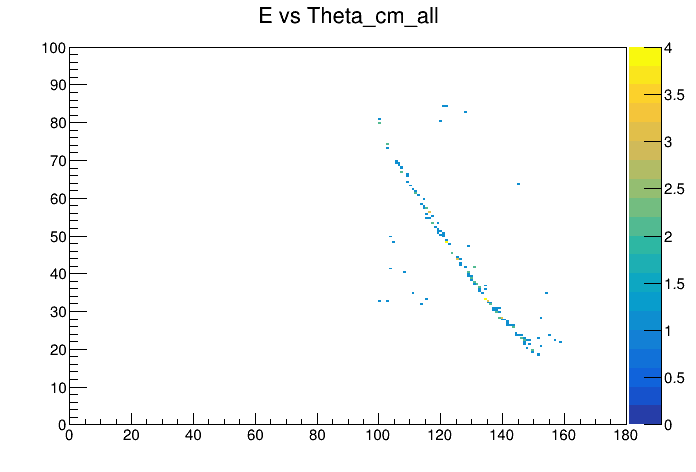

161


In [93]:
   c2->Clear();
   h_E_theta_cm_all->Draw("colz");
   c2->Draw();
   cout<<thecount1+thecount2<<'\n';